# 回帰モデル

statsmodelsでは線形回帰モデル
$$y=f(x_i)+e=\beta_0+\beta_1 x_1 +,\cdots,+ e $$
の切片($\beta_0$)と回帰係数($\beta_i$)を

|日本語|statsmodels||
|:-:|:-:|:-:|
|最小二乗法|OLS|
|加重最小二乗法|WLS|
|一般化最小二乗法|GLS|
|再帰的最小二乗法|Recursive LS|

という4つの方法により推定する。$x$は説明変数、$e$は誤差である。$y$は被説明変数で、$x$の線形結合としてモデル化される。最小二乗法によって得られるモデルがもっともらしくあるためには、誤差には

- 偏りがない。
- 分散は既知で一定である。
- 共分散は0である。
- 正規分布にしたがう。

という前提条件が課される。GLSは誤差の分散が一定ではない分散不均一性、誤差同士が相関をもつ自己相関をもつ誤差対処できるモデルで、WLSは分散不均一性を扱っていて、Recursive LSは自己相関をもつ誤差を扱っている。これらのモデルでは条件を満たせない誤差の問題をいろいろと調整をして、これらの条件を成り立たせることで回帰係数を推定している。

線形回帰というときには
1) パラメータに対して線形
という条件が課される。また、x(独立変数、説明変数)については
a) 確率変数ではなく固定値
b) 確率変数
の場合に分けられ、確率変数の場合にはxは誤差項と独立である必要がある。

$y$の分布を指数分布族として指定して、残差を任意の分布としたものとして[一般化線形モデル](https://qiita.com/innovation1005/items/8b8a2ca2176134692155)がある。これをさらに発展させたものとして

- [一般化推定方程式](https://qiita.com/innovation1005/items/42a64213ac725719c785)
- 一般化混合モデル
- [一般化加法モデル](https://qiita.com/innovation1005/items/cc3c4f7d17f9f2ddd2f5)

などがある。線形回帰ではOLSを用いるが、一般化線形モデルとその発展形では最尤法、またはそれに準じた方法を用いて回帰係数の推定を行う。

また、時間の経過とともに記録したデータを時系列データという。時系列データを扱うときには従属変数yと独立変数ｘがともに確率変数であるときがある。回帰モデルが独立変数の現在だけではなく、過去のデータも含むとき分布ラグモデルといい、説明変数が従属変数の過去の値からなるとき、分布ラグモデルに従属変数の過去の値を含むときには自己回帰モデル、または動学モデル(dynamic model)という。

同じ時点の異なるデータを集めたものをクロスデータとよぶ。このクロスデータを時系列データとしたものがパネルデータである。このようなデータを扱うのがパネルデータ分析である。

モデルがいくつかの回帰モデルからなるときには同時方程式モデルという。需要サイドのモデルと供給サイドのモデルと、それらの均衡を表現するモデルなどの場合である。また、このような問題は[ベクトル自己回帰モデル](https://qiita.com/innovation1005/items/b5333a939c0341b46ba9)または[ベクトル誤差修正モデル](https://qiita.com/innovation1005/items/d53d9ba4f9e8ee1832c6)で扱うこともできる。

時系列分析を扱うときにはその原系列がランダムウォークであるかどうかを判断する必要がる。ランダムウォークであれば1次の和分という。複数の1次の和分過程の線形結合が0次の和分過程であれば、それを共和分と呼ぶ。トレンドをもつ時系列の分析に役に立つ。[ベクトル誤差修正モデル](https://qiita.com/innovation1005/items/d53d9ba4f9e8ee1832c6)などを用いて問題に取り組む。

# 最小二乗法による推定
## 人工的に生成したデータでモデルを確認

$X$を説明変数、$y$を非説明変数とすると
$X=\beta_0+\beta_1 x$
とし
$y=X+e$
とする。$\beta$は係数で$e$はノイズである。

$\beta_0=1,\beta_1=0.1$としてとして人工データを生成し、そのデータを最小二乗法を用いて当てはめ、$\beta$を推定するという問題に取り組む。このようなアプローチは何か新しいモデルを学ぶときにはいつでも有効であり、学習の効率も良いと考える。

別に回帰分析を勉強するのは初めてではないので、頭の中にはいろいろな思いがある。それはどの程度役に立つのだろうかという疑問である。この例ではノイズは標準正規分布にしたがうとする。

初期化をする。

In [1]:
from __future__ import print_function
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import pandas as pd

np.random.seed(9876789)

つぎに人工データを生成する。この人工データの作り方であるが、Xはlinspaceを用いて作る。これは説明変数が確定した値であることを示している。また、y_trueも確定的な値である。確率変数になっているのはｙであり、これはy_trueにノイズを加えて確率変数にしている。

In [2]:
nsample = 200
x = np.linspace(0, 10, nsample)
X = sm.add_constant(x)
beta = np.array([1, 0.1])
y_true=np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + e

# Fit and summary:
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     15.11
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           0.000138
Time:                        13:45:08   Log-Likelihood:                -283.26
No. Observations:                 200   AIC:                             570.5
Df Residuals:                     198   BIC:                             577.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0446      0.141      7.397      0.0

サマリーレポートのもっとも上の二重線の下はデータに関する情報と推定したモデルの特性を示す情報が表示されている。
二番目の二重線から下には回帰係数に関する情報が表示されている。三番目の二重線の下には誤差項に関する情報が示されている。ここでいう誤差は
$y=E(y|x_i)+\epsilon$
の$\epsilon$のことであり、$E(y|x_i)$は推定された回帰係数を用いて得た$y$の期待値である。
結果をサマリーレポートとは別に出力することもできる。

Parameters:  [1.04464667 0.09496765]
R2:  0.07090595878266248


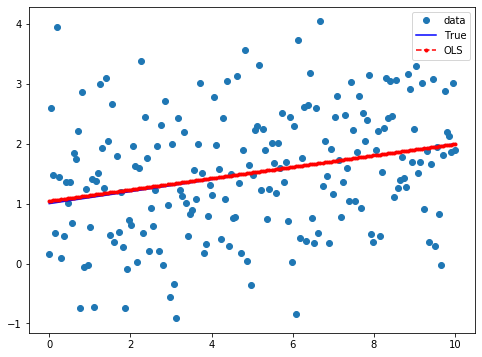

In [3]:
print('Parameters: ', res.params)
print('R2: ', res.rsquared)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.legend(loc='best');

これぞ線形回帰という結果が得られた。線形の意味の通り、直線がありその周りを観測値がうまく散らばっている。

ついでに被説明変数の頻度図も描いてみよう。

(array([ 6., 10., 27., 24., 36., 39., 24., 18., 12.,  4.]),
 array([-0.90914337, -0.41411565,  0.08091206,  0.57593978,  1.0709675 ,
         1.56599521,  2.06102293,  2.55605064,  3.05107836,  3.54610607,
         4.04113379]),
 <a list of 10 Patch objects>)

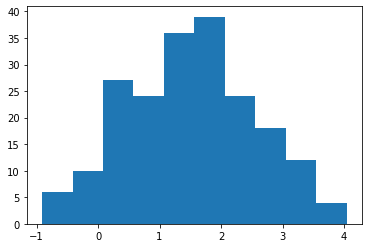

In [4]:
plt.hist(y)

([array([  0., 200.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([20., 20., 20., 20., 20., 20., 20., 20., 20., 20.])],
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 2 Lists of Patches objects>)

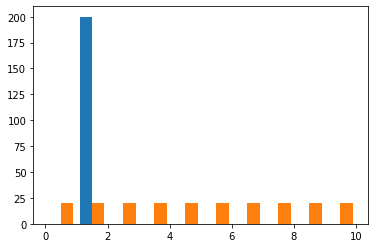

In [5]:
plt.hist(X)

(array([ 4., 10., 28., 34., 41., 38., 24., 14.,  5.,  2.]),
 array([-2.4713805 , -1.9351754 , -1.39897029, -0.86276519, -0.32656008,
         0.20964503,  0.74585013,  1.28205524,  1.81826034,  2.35446545,
         2.89067055]),
 <a list of 10 Patch objects>)

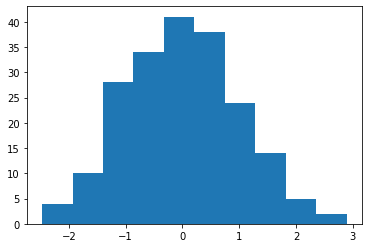

In [6]:
plt.hist(res.resid)

In [7]:
nsample = 100
x = np.linspace(0, 10, 100)
beta = np.array([1, 0.1])
e = np.random.uniform(size=nsample)
X = sm.add_constant(x)
y_true=np.dot(X, beta)
y = y_true + e-0.5

# Fit and summary:
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     106.9
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           2.23e-17
Time:                        13:45:09   Log-Likelihood:                -17.072
No. Observations:                 100   AIC:                             38.14
Df Residuals:                      98   BIC:                             43.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0006      0.058     17.386      0.0

こんどは説明変数と被説明変数の間の関係が非線形である場合について試してみよう。$X$を
$X=\beta_0+\beta_1 x + \beta_2 x^2$
とし、
$y=X+e$
とする。$\beta$は係数で$e$はノイズである。$\beta_0=1,\beta_1=0.1,\beta_2=10$として人工的にデータを生成し、そのデータについて最小二乗法を用いて$\beta$の推定を行う。eは正規乱数。

In [8]:
nsample = 100
x = np.linspace(0, 10, nsample)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 0.1])
e = np.random.normal(size=nsample)
X = sm.add_constant(X)
y_true = np.dot(X, beta)
y = y_true +e
# Fit and summary:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     682.6
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           7.19e-58
Time:                        13:45:09   Log-Likelihood:                -131.93
No. Observations:                 100   AIC:                             269.9
Df Residuals:                      97   BIC:                             277.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4995      0.270      1.848      0.0

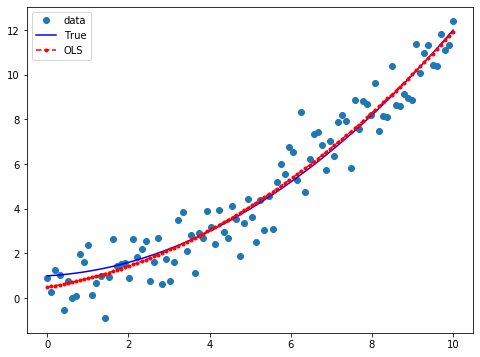

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, results.fittedvalues, 'r--.', label="OLS")
ax.legend(loc='best');

$\beta_1$の$p$値が0.781と大きく、条件数(Cond.No.)も144と大きく出ている。$p$値はノイズの生成に乱数を使っている影響で、PCによって値は結構ばらつく。つぎに乱数を一様分布として試してみよう。乱数の特性により$\beta$等の値がどの程度影響を受けるかを見てみたい。


In [10]:
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 0.1])
e = np.random.uniform(size=nsample)
X = sm.add_constant(X)
y_true=np.dot(X, beta) 
y =y_true + e-0.5
# Fit and summary:
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     7452.
Date:                Tue, 24 Nov 2020   Prob (F-statistic):          6.56e-107
Time:                        13:45:09   Log-Likelihood:                -9.3515
No. Observations:                 100   AIC:                             24.70
Df Residuals:                      97   BIC:                             32.52
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0227      0.079     12.890      0.0

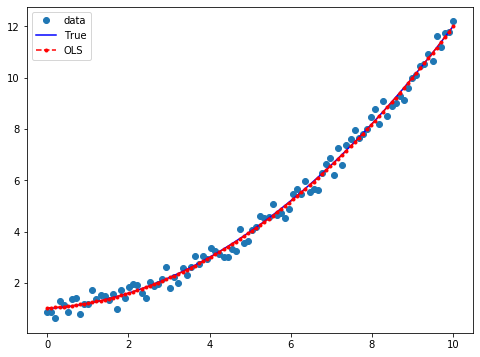

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.legend(loc='best');

結果はほぼ同じである。

先ほどと同じように結果をグラフで表してみる。

(array([23., 15., 12., 10.,  9.,  5.,  8.,  7.,  6.,  5.]),
 array([ 0.63095242,  1.78674853,  2.94254465,  4.09834076,  5.25413688,
         6.409933  ,  7.56572911,  8.72152523,  9.87732135, 11.03311746,
        12.18891358]),
 <a list of 10 Patch objects>)

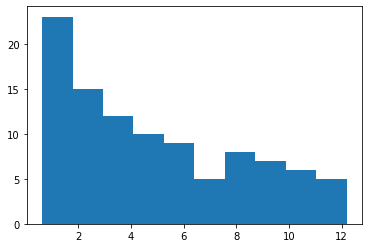

In [12]:
plt.hist(y)

よく'原因と結果が直線で表せる関係でないと線形回帰は使えない'という記述を見る。しかし、この説明だと最初は正しく理解していてもあるときから違う理解に代わってしまうことがよくある。パラメータについて線形とか変数について線形とかいう言い方もされる。$y=\beta_0+\beta_1 x^2$は線形の関数ではない。非線形だ。$x$について非線形だ。$x$の2乗を含むからである。ところがこれをパラメータの立場から見ると線形である。つまり、これは線形回帰モデルで回帰係数を推定できる対象となる。すでに見たとおりだ。しかし、統計の専門家は別として、これがややこしく、そのうちに理解が逆さになってしまうのだ。

statsmodelsのリファレンスにあるつぎの例は驚くほど良い例だと思う。$X$は$x$の多項式の部分とsinの部分で構成されている。これは直感的に訴えてくれる。これは、説明変数と被説明変数の間の関係が非線形である。しかし、線形結合であるので、つまりパラメータに対して線形なのだ。よって、OLSで解ける。sinが入っていると、なぜか変数について線形とかパラメータについて線形とか考えなくなる。sinはどう考えても非線形だ。それでもOLSで解ける。それは線形結合だからだ。

$X=\beta_0x+ \beta_1 \textrm{sin}(x)+ \beta_2 (x-5)^2+\beta_3$
$y=X+e$
$\beta_0=0.5,\beta_1=0.5,\beta_2=-0.02, \beta_3=5$としてデータを生成する。ノイズ($e$)は標準正規分布にしたがうとする。

In [13]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

# Fit and summary:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     252.1
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           1.48e-28
Time:                        13:45:10   Log-Likelihood:                -32.910
No. Observations:                  50   AIC:                             73.82
Df Residuals:                      46   BIC:                             81.47
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5174      0.026     20.202      0.0

結果はまずまずであり、回帰係数はどれも設定とほぼ似たような値になっている。

これは線形回帰の意味を正確に示している。線形という意味はデータが線形結合しているという意味であり、この場合にはそれぞれの説明変数のデータの和として$X$が生成されている。データ$y$を５％の信頼区間付きでプロットしてみるとよくわかる。最初に結果を数値として出力する。

In [14]:
print('Parameters: ', res.params)
print('Standard errors: ', res.bse)
print('Predicted values: ', res.predict())

Parameters:  [ 0.51739526  0.51938106 -0.02098469  4.80189965]
Standard errors:  [0.02561123 0.10068073 0.00224868 0.16606415]
Predicted values:  [ 4.27728238  4.77677481  5.23540459  5.62486591  5.92706839  6.13710925
  6.26407884  6.32956714  6.36411655  6.40220389  6.47657594  6.61286925
  6.8253981   7.11480274  7.46794419  7.8600629   8.25884673  8.6297397
  8.94161947  9.17191064  9.31029379  9.36040102  9.33921909  9.27429866
  9.1992277   9.14811314  9.14997716  9.22398897  9.37631532  9.59910735
  9.87179012 10.16444302 10.44271565 10.67347146 10.83023205 10.89752743
 10.87343776 10.7699087  10.61078887 10.42791147 10.25586429 10.12630695
 10.06276937 10.07678583 10.16599994 10.3145518  10.4956837  10.67613637
 10.82161338 10.90241593]


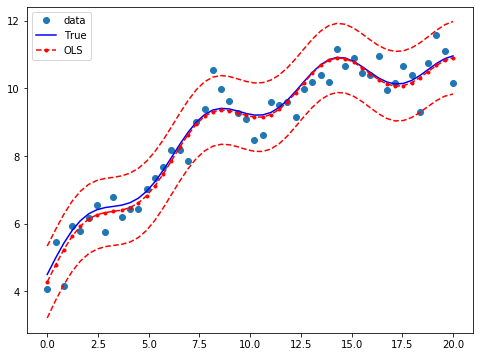

In [15]:
prstd, iv_l, iv_u = wls_prediction_std(res)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');

$y$はぐねぐねしているのに最小二乗法で解けている。説明変数の単なる和なので、説明変数がくねくねしていれば被説明変数もそれにしたがってくねくねしている。単に直線の足し算だけではないということだ。

例によって$y$の頻度図を作っておこう。

(array([ 2.,  1.,  5.,  5.,  2.,  4.,  6.,  8., 12.,  5.]),
 array([ 4.06239049,  4.81304618,  5.56370187,  6.31435756,  7.06501325,
         7.81566894,  8.56632463,  9.31698032, 10.06763601, 10.8182917 ,
        11.56894739]),
 <a list of 10 Patch objects>)

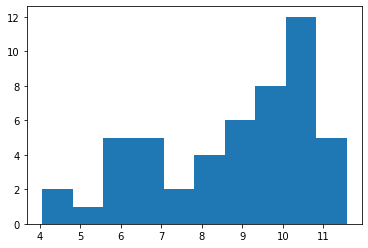

In [16]:
plt.hist(y)

この$y$の頻度図についても足し算になっているということだ。なるほど。

コーシー分布をつかってノイズを作ってみよう。金融の場合はこんなもんだ。


In [17]:
from scipy.stats import cauchy
nsample = 100
x = np.linspace(0, 10, 100)
beta = np.array([1, 0.1])
X = sm.add_constant(x)
y_true=np.dot(X, beta)
e = cauchy.rvs(loc=0,scale=0.1,size=nsample)
y = y_true + e

# Fit and summary:
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     11.09
Date:                Tue, 24 Nov 2020   Prob (F-statistic):            0.00122
Time:                        13:45:10   Log-Likelihood:                -103.58
No. Observations:                 100   AIC:                             211.2
Df Residuals:                      98   BIC:                             216.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2162      0.137      8.896      0.0

In [18]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]
y_true = np.dot(X, beta)
y = y_true +  cauchy.rvs(loc=0,scale=0.1,size=nsample)

# Fit and summary:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     36.23
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           3.57e-12
Time:                        13:45:10   Log-Likelihood:                -73.116
No. Observations:                  50   AIC:                             154.2
Df Residuals:                      46   BIC:                             161.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4023      0.057      7.029      0.0

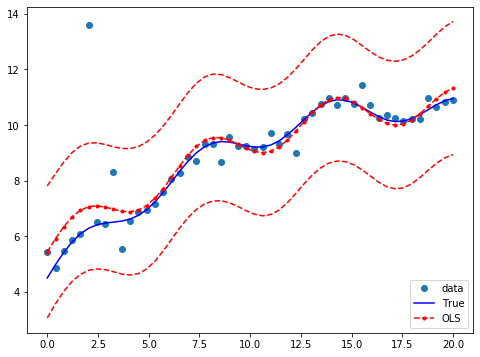

In [19]:
prstd, iv_l, iv_u = wls_prediction_std(res)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');

Cond.No.は変わらないのに$p$値は大きく変わった。切片も回帰係数も再現性が弱くなった。$y$の頻度図を見てみる。

(array([ 4.,  5.,  3.,  4.,  6.,  8., 16.,  3.,  0.,  1.]),
 array([ 4.85581349,  5.72990334,  6.6039932 ,  7.47808305,  8.3521729 ,
         9.22626275, 10.1003526 , 10.97444245, 11.8485323 , 12.72262215,
        13.59671201]),
 <a list of 10 Patch objects>)

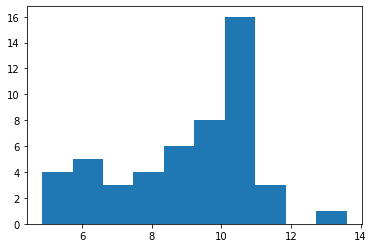

In [20]:
plt.hist(y)

ファットテイルで中心もずれている。実行するたびに大きく異なるノイズが生成されるので、何度も行ってみると面白い。


## データの特性の把握とモデル選択

### ダミー変数

数値ではないデータが得られたときにそれらを数値に変換して回帰分析をするときに、その変換されたデータをダミー変数という。その威力を簡単に見てみよう。

#### 人工的に作ったデータの例

人工データを作ってその有効性を調べてみよう。statsmodelsのリファレンスのcategoricalの例をみてみよう。

In [21]:
import string
string_var = [string.ascii_lowercase[0:5],   
              string.ascii_lowercase[5:10],           
              string.ascii_lowercase[10:15],          
              string.ascii_lowercase[15:20],          
              string.ascii_lowercase[20:25]]
string_var

['abcde', 'fghij', 'klmno', 'pqrst', 'uvwxy']

によって生成する。これを5倍に膨らます。

In [22]:
string_var *= 5
string_var

['abcde',
 'fghij',
 'klmno',
 'pqrst',
 'uvwxy',
 'abcde',
 'fghij',
 'klmno',
 'pqrst',
 'uvwxy',
 'abcde',
 'fghij',
 'klmno',
 'pqrst',
 'uvwxy',
 'abcde',
 'fghij',
 'klmno',
 'pqrst',
 'uvwxy',
 'abcde',
 'fghij',
 'klmno',
 'pqrst',
 'uvwxy']

つぎにこの結果をソートする。

In [23]:
string_var = np.asarray(sorted(string_var))
string_var

array(['abcde', 'abcde', 'abcde', 'abcde', 'abcde', 'fghij', 'fghij',
       'fghij', 'fghij', 'fghij', 'klmno', 'klmno', 'klmno', 'klmno',
       'klmno', 'pqrst', 'pqrst', 'pqrst', 'pqrst', 'pqrst', 'uvwxy',
       'uvwxy', 'uvwxy', 'uvwxy', 'uvwxy'], dtype='<U5')

並べ替えた結果からカテゴリカル変数を作る。

In [24]:
design = sm.tools.categorical(string_var, drop=True)
design

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

被説明変数をつくってみよう。

In [25]:
y0= np.arange(10,60, step=2)
y0

array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
       44, 46, 48, 50, 52, 54, 56, 58])

In [26]:
y= np.floor(y0/10)
y

array([1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 4., 4.,
       4., 4., 4., 5., 5., 5., 5., 5.])

いよいよ回帰を行う。

In [27]:
X=design
model = sm.OLS(y, X)
results = model.fit()
(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.965e+31
Date:                Tue, 24 Nov 2020   Prob (F-statistic):          1.88e-310
Time:                        13:45:11   Log-Likelihood:                 850.32
No. Observations:                  25   AIC:                            -1691.
Df Residuals:                      20   BIC:                            -1685.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0000   2.05e-16   4.88e+15      0.000       1.000       1.000
x2             2.0000   2.05e-16   9.77e+15      0.000       2.000       2.000
x3             3.0000   2.05e-16   1.47e+16      0.000       3.000       3.000
x4             4.0000   2.05e-16   1.95e+16      0.000       4.000       4.000
x5             5.0000   2.05e-16   2.44e+16      0.000       5.000       5.000
==============================================================================
Omnibus:                        7.639   Durbin-Watson:                   0.200
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                6.952
Skew:                           1.291   Prob(JB):                       0.0309
Kurtosis:                       2.917   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

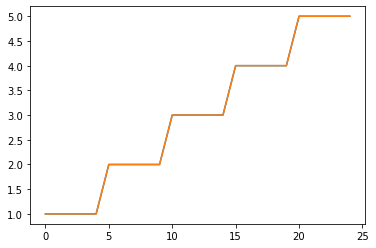

In [28]:
plt.plot(y)
plt.plot(results.fittedvalues)

(array([15.,  0.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  5.]),
 array([0.00000000e+00, 8.88178420e-17, 1.77635684e-16, 2.66453526e-16,
        3.55271368e-16, 4.44089210e-16, 5.32907052e-16, 6.21724894e-16,
        7.10542736e-16, 7.99360578e-16, 8.88178420e-16]),
 <a list of 10 Patch objects>)

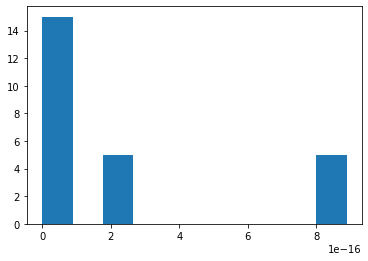

In [29]:
plt.hist(results.resid)

R-squaredは1となりました。

#### Statsmodelsのサンプル

さらにダミー変数の役割が直感的に理解できるように、statsmodelsのサンプルを見てみよう。

50個の標本を生成する。groupsに0,1,2を設定する。それをもとにダミー変数を生成する。
説明変数xを0から20までの数値を50個に分割して生成する。それに３つのグループの内の最初のgroupsを取り除き加え、かつ定数(切片)を付加する。

$\beta$を1,3,-3,10としてy_trueを生成する。ノイズは標準正規乱数とする。

In [30]:
nsample = 50
groups = np.zeros(nsample, int) # data typeを整数(int)に指定
groups

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [31]:
groups[20:40] = 1
groups[40:] = 2
groups

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [32]:
#dummy = (groups[:,None] == np.unique(groups)).astype(float)
dummy = sm.categorical(groups, drop=True)
dummy

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

In [33]:
x = np.linspace(0, 20, nsample)
x

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [34]:

# drop reference category
X = np.column_stack((x, dummy[:,1:])) # 2次元配列に変換
X

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.40816327,  0.        ,  0.        ],
       [ 0.81632653,  0.        ,  0.        ],
       [ 1.2244898 ,  0.        ,  0.        ],
       [ 1.63265306,  0.        ,  0.        ],
       [ 2.04081633,  0.        ,  0.        ],
       [ 2.44897959,  0.        ,  0.        ],
       [ 2.85714286,  0.        ,  0.        ],
       [ 3.26530612,  0.        ,  0.        ],
       [ 3.67346939,  0.        ,  0.        ],
       [ 4.08163265,  0.        ,  0.        ],
       [ 4.48979592,  0.        ,  0.        ],
       [ 4.89795918,  0.        ,  0.        ],
       [ 5.30612245,  0.        ,  0.        ],
       [ 5.71428571,  0.        ,  0.        ],
       [ 6.12244898,  0.        ,  0.        ],
       [ 6.53061224,  0.        ,  0.        ],
       [ 6.93877551,  0.        ,  0.        ],
       [ 7.34693878,  0.        ,  0.        ],
       [ 7.75510204,  0.        ,  0.        ],
       [ 8.16326531,  1.        ,  0.   

In [35]:
X = sm.add_constant(X, prepend=False) #定数は最初の列(True)ではなく、最後の列（False)に加える
beta = [1., 3, -3, 10]
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + e

# Inspect the data:最初の５つのデータを確認する。
print(X[:5,:])
print(y_true[:5])
print(y[:5])
print(groups)
print(dummy[:5,:])

[[0.         0.         0.         1.        ]
 [0.40816327 0.         0.         1.        ]
 [0.81632653 0.         0.         1.        ]
 [1.2244898  0.         0.         1.        ]
 [1.63265306 0.         0.         1.        ]]
[10.         10.40816327 10.81632653 11.2244898  11.63265306]
[ 8.34031877  8.34075033 10.63335518 11.61729371 12.47480086]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


２つのダミー変数の影響のある部分と無い部分の3つのグループから構成されるy_trueを可視化する。

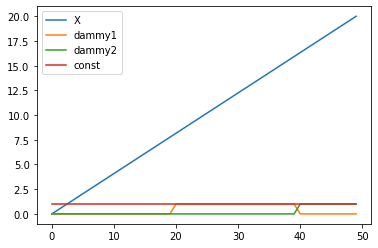

In [36]:
plt.plot(X[:,0],label='X')
plt.plot(X[:,1],label='dammy1')
plt.plot(X[:,2],label='dammy2')
plt.plot(X[:,3],label='const')
plt.legend()

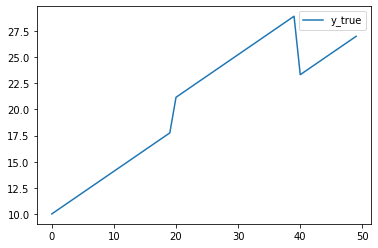

In [37]:
plt.plot(y_true,label='y_true')
plt.legend()

$X$と$\beta$の関係が見て取れる。

In [38]:
# Fit and summary:
res2 = sm.OLS(y, X).fit()
(res2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     529.6
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           1.17e-35
Time:                        13:45:12   Log-Likelihood:                -71.380
No. Observations:                  50   AIC:                             150.8
Df Residuals:                      46   BIC:                             158.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0727      0.069     15.647      0.000       0.935       1.211
x2             2.2879      0.651      3.515      0.001       0.978       3.598
x3            -4.0276      1.061     -3.797      0.000      -6.163      -1.893
const          9.5646      0.355     26.950      0.000       8.850      10.279
==============================================================================
Omnibus:                        1.916   Durbin-Watson:                   2.179
Prob(Omnibus):                  0.384   Jarque-Bera (JB):                1.289
Skew:                          -0.385   Prob(JB):                        0.525
Kurtosis:                       3.160   Cond. No.                         96.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

結果は良好であるのでグラフに描いてみよう。ダミー変数の利用により、３つのグループの変数が区別されている。

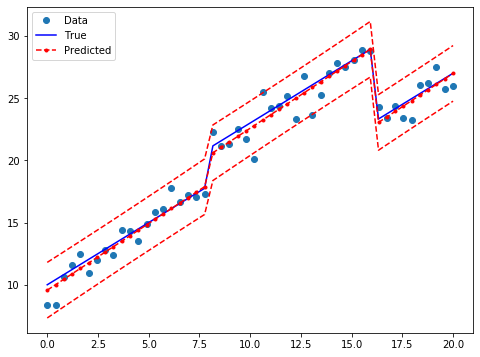

In [39]:
prstd, iv_l, iv_u = wls_prediction_std(res2)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="Data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res2.fittedvalues, 'r--.', label="Predicted")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
legend = ax.legend(loc="best")

# 結合仮説の検定 
## F検定

線形回帰のサマリーレポートのF検定はすべての回帰係数がゼロであるという仮説を帰無仮説としている。ここでは、その内のダミー変数の回帰係数がゼロだという仮説を検定してみる。これを帰無仮説とする。Rは検定の条件を表している。[0,1,0,0]はx2(ダミー変数)を表していて、[0,0,1,0]はx3(ダミー変数)を表している。ダミー変数の回帰係数がゼロだという帰無仮説は$R \times \beta=0$である。F検定の結果は、3つのグループが同じであるという仮説を非常に強く棄却している。つまり、$\beta_i$たちはゼロではないのだ。また、この検定の仮説は数式を用いて表現することもできる。

In [40]:
R = [[0, 1, 0, 0], [0, 0, 1, 0]]
print(np.array(R))
print(res2.f_test(R))

[[0 1 0 0]
 [0 0 1 0]]
<F test: F=array([[105.95506785]]), p=6.020834636169324e-18, df_denom=46, df_num=2>


数式を用いて帰無仮説を表現する。

In [41]:
# You can also use formula-like syntax to test hypotheses

print(res2.f_test("x1 = x2 = x3 = const =0"))

<F test: F=array([[5101.27547749]]), p=2.993779578546905e-60, df_denom=46, df_num=4>


### 構成割合の小さなグループの影響

statsmodelsのリファレンスにあるこの例も非常に良い例である。あるグループまたは変数の影響を小さくしてみよう。この問題は仮説検定と密接な関係にある。ここでは前節のF検定と回帰係数のp－値を用いて考えてみよう。

実際のデータを生成する際に$\beta_1=0.3$を小さくし、$\beta_2=-0.0$としてみる。回帰係数を見てみると、$\beta_1$は0.3なので帰無仮説のゼロに近くなる。$beta_2$はゼロであるので帰無仮説と同じである。この設定でデータを人工的に生成しているので、仮説検定の結果もそうなってほしい。しかし、実際にはそうはならない。まず結果を見てみよう。

In [42]:
beta = [1., 0.3, 0, 10]
y_true = np.dot(X, beta)
y = y_true + e #np.random.normal(size=nsample)
res3 = sm.OLS(y, X).fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     538.6
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           8.03e-36
Time:                        13:45:12   Log-Likelihood:                -71.380
No. Observations:                  50   AIC:                             150.8
Df Residuals:                      46   BIC:                             158.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0727      0.069     15.647      0.0

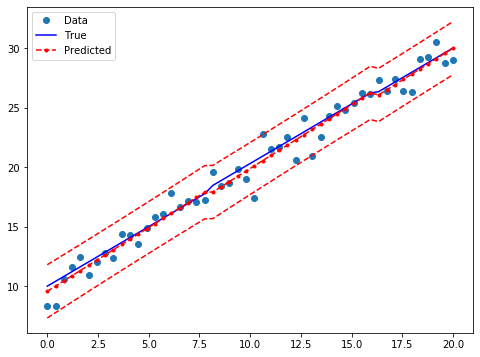

In [43]:
prstd, iv_l, iv_u = wls_prediction_std(res3)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="Data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res3.fittedvalues, 'r--.', label="Predicted")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
legend = ax.legend(loc="best")

X2が$\beta_1$、X3が$\beta_2$であるので、どちらもp値は0.1よりも大きい。これでは帰無仮説を棄却できない。期待としては$\beta_1$のp値は0.1または0.05よりも小さく、$\beta_2$のものは0.1よりも大きくあってほしい。したがって、$\beta_1$については期待に応えられていない。

つぎにF検定でみてみよう。サマリーレポートのF検定は1.72e-34と非常に小さい。したがって、3つの回帰変数がゼロであるという帰無仮説は棄却されている。これをチェックしてみよう。

In [44]:
R = [[1, 0, 0, 0],[0, 1, 0, 0], [0, 0, 1, 0]]
print(res3.f_test(R))

<F test: F=array([[538.59614015]]), p=8.028769864854566e-36, df_denom=46, df_num=3>


結果は同じである。つぎに1つ1つ見ていこう。

In [45]:
R = [[0, 1, 0, 0]]
print(res3.f_test(R))

<F test: F=array([[0.40072565]]), p=0.5298493953656829, df_denom=46, df_num=1>


In [46]:
R = [[0, 0, 1, 0]]
print(res3.f_test(R))

<F test: F=array([[0.93862592]]), p=0.337698081713504, df_denom=46, df_num=1>


どちらも回帰係数のｐ値と同じという結果になった。
つぎに$\beta_1$と$\beta_2$についての回帰係数を見てみよう。

In [47]:
R = [[0, 1, 0, 0], [0, 0, 1, 0]]
print(res3.f_test(R))

<F test: F=array([[0.56579338]]), p=0.5718112804423441, df_denom=46, df_num=2>


そうすると先ほどのF検定の結果とは異なりp値は0.3である程度の大きさをもっている。これでは帰無仮説を棄却できるとは言えない。

さてこの際の表現方法であるが、一方の$\beta$は実際にゼロではなく0.3だ。実際のデータの生成においても帰無仮説は正しくない。ここで、統計学の主義について説明しておこう。統計学の仮説検定では帰無仮説を採択するという結論はないのだ。統計学では真理を明らかにすることが目的ではなく、数学的な誤謬を減らすことにある([仮説検定wiki参照](https://ja.wikipedia.org/wiki/%E4%BB%AE%E8%AA%AC%E6%A4%9C%E5%AE%9A))。したがって、この場合の結論は、棄却するに足る証拠はないとか、棄却するに足るには十分ではない、などの表現を用いる。そして今回は、その表現が実際に正しい。気を付ける必要があるのは実際に帰無仮説が棄却できない場合に、帰無仮説が正しいと思ってしまうことである。これは今回の例のようにかなり微妙なのである。

ここでの問題の原因は仮説検定の本質的な特性にあるのだ。それはつぎのように説明される。帰無仮説を平均値$\mu=50$としよう。図に書くと
![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/267055/077b4c8e-d13c-4ccd-094b-ba89abf19c18.png)
というイメージだ。グレーの部分が棄却域である。実際の分布の$\mu=48$としてみよう。そうすると
![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/267055/d14163cb-d41c-d423-39e9-db6f403afbd1.png)
そうすると棄却域のグレーの分は少し増える。しかし、帰無仮説を棄却したければ、$\mu$をもっとズラせばよいのである。そこで$\mu=56$にしてみよう。
![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/267055/a017d567-7b4e-829f-25a5-eb844a889757.png)
詳しくは[statsmodelsによる統計的仮説検定 入門](https://qiita.com/innovation1005/items/00362c2129bfe25fe272)
を参照してほしい。

株式市場では、よく価格がランダムウォークにしたがうという帰無仮説を立てる。これは金融理論の骨幹である。この帰無仮説を棄却できる場合はかなり稀である。しかし、だからと言って株価がランダムウォークにしたがうとは言えないのである。単に、今回は棄却するに十分な証拠がなかっただけなのである。

## 考察

### 最小二乗法を使うと標準化をする必要はないか？
### ダミー変数を使うときはその平均値と分散を気にする必要があるか？p－値は使えるか？
### 説明変数の標準偏差が同じで平均値がゼロに近い時はどうなるか？p－値は使えるか？



# 多重共線性

[Longley(1967)](https://www.statsmodels.org/devel/datasets/generated/longley.html)のデータは高い多重共線性をもつことで知られている。これは非常に高い相関をもつデータであることを示している。回帰係数を計算する際にそれらを不安定にする原因となる。したがって、データが多重共線性をもてば、安定性を得るためにモデルの特性を若干変える必要がある。

観測値の数 - 6

変数名と内容::

        TOTEMP - 総雇用者数(endog)
        GNPDEFL - GNP デフレーター
        GNP - GNP
        UNEMP - 非雇用者数
        ARMED - 軍隊の規模
        POP - 人口
        YEAR - 西暦 (1947 - 1962)

In [48]:
from statsmodels.datasets.longley import load_pandas
y = load_pandas().endog
X = load_pandas().exog
X = sm.add_constant(X)
X

C:\Users\moriya\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,1.0,83.0,234289.0,2356.0,1590.0,107608.0,1947.0
1,1.0,88.5,259426.0,2325.0,1456.0,108632.0,1948.0
2,1.0,88.2,258054.0,3682.0,1616.0,109773.0,1949.0
3,1.0,89.5,284599.0,3351.0,1650.0,110929.0,1950.0
4,1.0,96.2,328975.0,2099.0,3099.0,112075.0,1951.0
5,1.0,98.1,346999.0,1932.0,3594.0,113270.0,1952.0
6,1.0,99.0,365385.0,1870.0,3547.0,115094.0,1953.0
7,1.0,100.0,363112.0,3578.0,3350.0,116219.0,1954.0
8,1.0,101.2,397469.0,2904.0,3048.0,117388.0,1955.0
9,1.0,104.6,419180.0,2822.0,2857.0,118734.0,1956.0


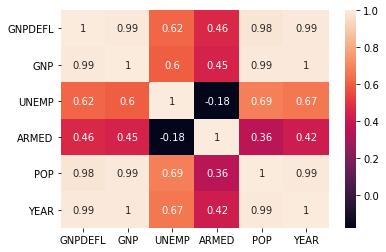

In [49]:
import seaborn as sns
correlation_matrix = np.corrcoef(X.iloc[:,1:].transpose())
sns.heatmap(correlation_matrix, annot=True,
            xticklabels = X.columns[1:],
            yticklabels = X.columns[1:])
# グラフを表示する
plt.show()

In [50]:
# Fit and summary:
ols_model = sm.OLS(y, X)
ols_results = ols_model.fit()
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     330.3
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           4.98e-10
Time:                        13:45:13   Log-Likelihood:                -109.62
No. Observations:                  16   AIC:                             233.2
Df Residuals:                       9   BIC:                             238.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.482e+06    8.9e+05     -3.911      0.0

C:\Users\moriya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


#### 条件数(Condition number)

多重共線性を測る方法として条件数(Cond. No.)がある。Greeneによると、20を超えるとモデルには問題があるととらえたほうがよさそうである。条件数の計算は
- ステップ１：説明変数を標準化する。
- ステップ２：相関行列の固有値を求め、固有値の最大値と最小値の比率の平方根をとる。

という2つのステップからなる。

In [51]:
# step 1
norm_x = X.values.copy()
for i, name in enumerate(X):
    if name == "const":
        continue
    norm_x[:,i] = X[name]/np.linalg.norm(X[name])

norm_xtx = np.dot(norm_x.T,norm_x)
# step 2
eigs = np.linalg.eigvals(norm_xtx)
condition_number = np.sqrt(eigs.max() / eigs.min())
print(condition_number)

56240.8709117813


条件数に問題があれば、相関行列を別のものにすればよいのであるから、
条件数が大きければ説明変数を1つ落とすことで、大きな改善がみられることがある。モデルの特性を若干変えるのである。

In [52]:
# 説明変数の削減
ols_results2 = sm.OLS(y.iloc[:14], X.iloc[:14]).fit()
print("Percentage change %4.2f%%\n"*7 % tuple
      ([i for i in (ols_results2.params - ols_results.params)/ols_results.params*100]))

Percentage change 4.55%
Percentage change -105.20%
Percentage change -3.43%
Percentage change 2.92%
Percentage change 3.32%
Percentage change 97.06%
Percentage change 4.64%



In [53]:
ols_results.params

const     -3.482259e+06
GNPDEFL    1.506187e+01
GNP       -3.581918e-02
UNEMP     -2.020230e+00
ARMED     -1.033227e+00
POP       -5.110411e-02
YEAR       1.829151e+03
dtype: float64

In [54]:
ols_results2.params

const     -3.640776e+06
GNPDEFL   -7.839183e-01
GNP       -3.459049e-02
UNEMP     -2.079304e+00
ARMED     -1.067479e+00
POP       -1.007040e-01
YEAR       1.913946e+03
dtype: float64

#### DFBETAS

DFBETASを見る方法もある。これはそれぞれの回帰係数がどの程度変わるかを測定する標準的な方法である。 

統計では、データセットから特定のデータを削除することによって計算結果が著しく変化する場合、そのデータを「影響力のある観測点」という。特に、回帰分析では、あるデータ点を除くことでパラメーター推定に大きな影響を与えるものを影響力のあるデータポイントという。

一般に絶対値が$2/ \sqrt(N)$よりも大きいと影響のある観測値とみなせる

In [55]:
2./len(X)**.5

0.5

In [56]:
infl = ols_results.get_influence()
print(infl.summary_frame().filter(regex="dfb"))

    dfb_const  dfb_GNPDEFL   dfb_GNP  dfb_UNEMP  dfb_ARMED   dfb_POP  dfb_YEAR
0   -0.016406    -0.234566 -0.045095  -0.121513  -0.149026  0.211057  0.013388
1   -0.020608    -0.289091  0.124453   0.156964   0.287700 -0.161890  0.025958
2   -0.008382     0.007161 -0.016799   0.009575   0.002227  0.014871  0.008103
3    0.018093     0.907968 -0.500022  -0.495996   0.089996  0.711142 -0.040056
4    1.871260    -0.219351  1.611418   1.561520   1.169337 -1.081513 -1.864186
5   -0.321373    -0.077045 -0.198129  -0.192961  -0.430626  0.079916  0.323275
6    0.315945    -0.241983  0.438146   0.471797  -0.019546 -0.448515 -0.307517
7    0.015816    -0.002742  0.018591   0.005064  -0.031320 -0.015823 -0.015583
8   -0.004019    -0.045687  0.023708   0.018125   0.013683 -0.034770  0.005116
9   -1.018242    -0.282131 -0.412621  -0.663904  -0.715020 -0.229501  1.035723
10   0.030947    -0.024781  0.029480   0.035361   0.034508 -0.014194 -0.030805
11   0.005987    -0.079727  0.030276  -0.008883  -0.

### AIC

つぎにどのようにモデルを選択したらよいのか考えてみる。実験室で行う実験のように実験計画が緻密にできる場合と、社会科学のように何もかも未知の場合では選択の方法は全く違うはずだ。

ここでは人工データを作っているので、真の値は分かっているし、その生成の仕方も分かっているので、真のモデルと複雑なモデルで試してみる。

真のモデルは  
$X=\beta_0+\beta_1 x$で  
複雑なモデルは  
$X=\beta_0+\beta_1 x + \beta_2 x^2$  
とする。  

まずはノイズを正規分布で生成し、真のモデルと複雑なモデルでデータの当てはめを行う。


In [57]:
def normal_ols(nsample=100):
    sig=1
    x = np.linspace(0, 10, nsample)
    beta = np.array([1, 0.1])
    X = sm.add_constant(x)
    y_true=np.dot(X, beta)
    noise=sig * np.random.normal(size=nsample)
    y = y_true + noise
    model = sm.OLS(y, X)
    res1 = model.fit()
    
    X1 = np.column_stack((x, x**2))
    beta = np.array([1, 0.1, 10])
    X1 = sm.add_constant(X1)
    model = sm.OLS(y, X1)
    res2 = model.fit()
    y_true2=np.dot(X1, beta)
    y2 = y_true2 + sig * np.random.normal(size=nsample)
    return res1,res2,y,y2

真のモデルのAICと残差平方和をaに保存する。複雑なモデルの結果をbに保存する。

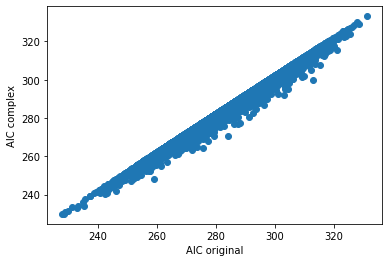

In [58]:
a=[]
b=[]
nsample=100
for i in range(10000):
    res1,res2,y,y2=normal_ols(nsample)
    a.append([res1.aic,(res1.resid**2).sum()])
    b.append([res2.aic,(res2.resid**2).sum()])
a=pd.DataFrame(a)
b=pd.DataFrame(b)
plt.scatter(a.iloc[:,0],b.iloc[:,0])
plt.xlabel('AIC original')
plt.ylabel('AIC complex')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024C7630BEB8>]],
      dtype=object)

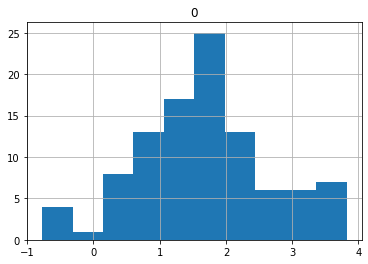

In [59]:
y=pd.DataFrame(y)
y.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024C7626CB38>]],
      dtype=object)

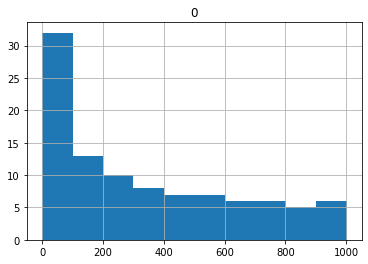

In [60]:
y2=pd.DataFrame(y2)
y2.hist()

(284.5933863165079, 285.5638187891782, 14.359687736291312, 14.435623452476786)

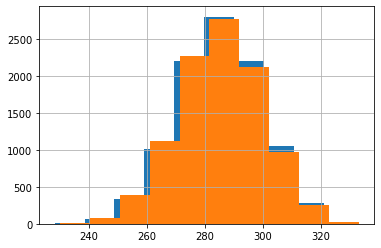

In [61]:
a.iloc[:,0].hist()
b.iloc[:,0].hist()
a.iloc[:,0].mean(),b.iloc[:,0].mean(), a.iloc[:,0].std(),b.iloc[:,0].std()

AICの散布図の結果だけでは微妙な違いが分からない。そこで残差平方和も比べてみる。ついでにその平均値も求めてみる。

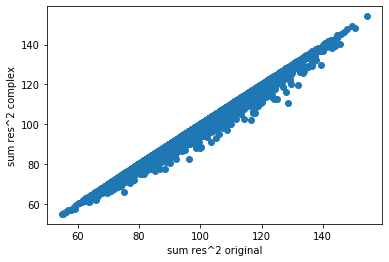

284.5933863165079 285.5638187891782 97.85342993767185 96.86137087878807


In [62]:
plt.scatter(a.iloc[:,1],b.iloc[:,1])
plt.xlabel('sum res^2 original')
plt.ylabel('sum res^2 complex')
plt.show()
print(a.iloc[:,0].mean(),b.iloc[:,0].mean(),a.iloc[:,1].mean(),b.iloc[:,1].mean())

散布図の結果は同じようなものだ。

AICの平均は

```
145.88304544252185 146.84444093076596
```
で、真のモデルの方が小さい。残差平方和の平均値は

```
24.439749932704437 24.188326516523965
```
複雑なモデルの方が小さい。ただし、この違いに大きな意味があるわけではない。1000回という実験(シミュレーション)では回数が少なすぎる。

つぎにnsample=5と極端に小さくしてみる。

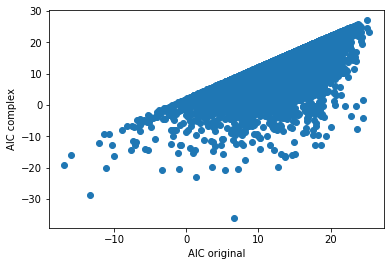

In [63]:
a=[]
b=[]
nsample=5
for i in range(10000):
    res1,res2,y,y2=normal_ols(nsample)
    a.append([res1.aic,(res1.resid**2).sum()])
    b.append([res2.aic,(res2.resid**2).sum()])
a=pd.DataFrame(a)
b=pd.DataFrame(b)
plt.scatter(a.iloc[:,0],b.iloc[:,0])
plt.xlabel('AIC original')
plt.ylabel('AIC complex')
plt.show()

大分ひずんでいる。

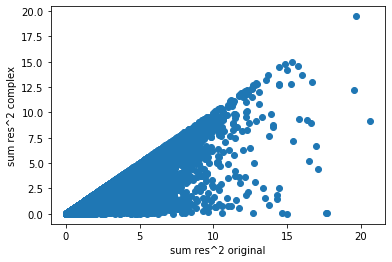

13.748334912460384 12.662334372190962 2.967587390965132 1.9806075502896463


In [64]:
plt.scatter(a.iloc[:,1],b.iloc[:,1])
plt.xlabel('sum res^2 original')
plt.ylabel('sum res^2 complex')
plt.show()
print(a.iloc[:,0].mean(),b.iloc[:,0].mean(),a.iloc[:,1].mean(),b.iloc[:,1].mean())

AICは複雑なモデルの方が小さく、残差平方和の平均も複雑なモデルの方が小さい。

つぎに極端なノイズの影響をみたいので、コーシー分布を使う。コーシー分布には平均もないので、実際の状況に近いと考える。まず、正規分布とコーシー分を比べる。

最初はnsample=100とする。

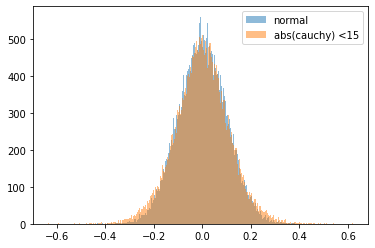

(0.9928421845775447,
 1.0273419567835698,
 -0.05710452989814413,
 28.643262007687934)

In [65]:
from scipy.stats import norm, kurtosis
from scipy.stats import cauchy
trial=100000
m1=[]
v1=[]
k1=[]
nsample=100
for i in range(trial):
    s = np.random.normal(0, 1, 100)
    m1.append(np.mean(s))
    v1.append(np.std(s))
    k1.append(kurtosis(s))
m2=[]
v2=[]
k2=[]
for i in range(trial):
    s=[]
    i=1
    while i<=100:
        s0 = (cauchy.rvs(0,0.13,1))
        if abs(s0)<15:
            s.append(s0)
            i+=1
    m2.append(np.mean(s))
    v2.append(np.std(s))
    k2.append(kurtosis(s))
bins=np.linspace(np.min(m2),np.max(m2),1000)
plt.hist(m1,bins=bins,label='normal',alpha=0.5)
plt.hist(m2,bins=bins,label='abs(cauchy) <15',alpha=0.5)
plt.legend()
plt.show()
np.mean(v1),np.mean(v2),np.mean(k1),np.mean(k2)

In [66]:
def cauchy_ols(nsample=100):
    x = np.linspace(0, 10, nsample)
    beta = np.array([1, 0.1])
    X = sm.add_constant(x)
    y_true=np.dot(X, beta)
    e=[]
    i=1
    while i<=nsample:
        e0 = cauchy.rvs(loc=0,scale=1,size=1)
        if abs(e0)<10:
            e.append(e0[0])
            i+=1
    y = y_true + e
    model = sm.OLS(y, X)
    res1 = model.fit()

    X1 = np.column_stack((x, x**2))
    beta = np.array([1, 0.1, 0.01])
    X1 = sm.add_constant(X1)
    model = sm.OLS(y, X1)
    res2 = model.fit()
    return res1,res2

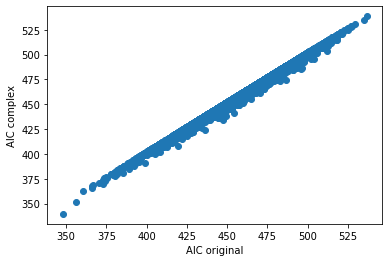

In [67]:
a=[]
b=[]
nsample=100
for i in range(10000):
    res1,res2=cauchy_ols(nsample)
    a.append([res1.aic,(res1.resid**2).sum()])
    b.append([res2.aic,(res2.resid**2).sum()])
a=pd.DataFrame(a)
b=pd.DataFrame(b)

plt.scatter(a.iloc[:,0],b.iloc[:,0])
plt.xlabel('AIC original')
plt.ylabel('AIC complex')
plt.show()

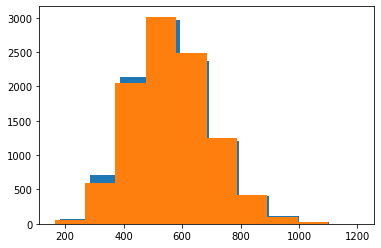

In [68]:
plt.hist(a.iloc[:,1])
plt.hist(b.iloc[:,1])
plt.show()

AICそのものが大きく増えている。散布図ではよくわからないが複雑なモデルの方がAICは小さそうだ。

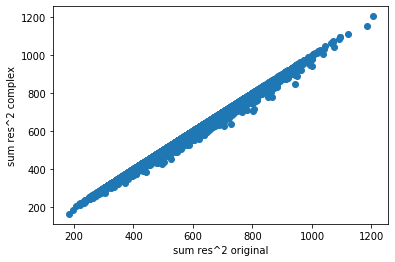

458.7617766986466 459.70658486583363 568.9076745127896 563.0068632426229


In [69]:
plt.scatter(a.iloc[:,1],b.iloc[:,1])
plt.xlabel('sum res^2 original')
plt.ylabel('sum res^2 complex')
plt.show()
print(a.iloc[:,0].mean(),b.iloc[:,0].mean(),a.iloc[:,1].mean(),b.iloc[:,1].mean())

結果は解釈に難しくなった。

真のモデルのAICが小さく、残差平方和の平均は複雑なモデルの方が小さい。

つぎにnsample=5にしてみよう。

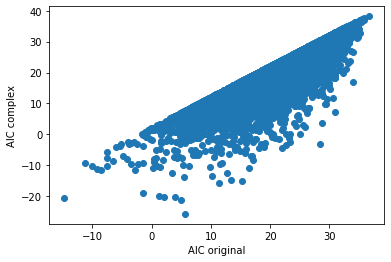

In [70]:
a=[]
b=[]
nsample=5
for i in range(10000):
    res1,res2=cauchy_ols(nsample)
    a.append([res1.aic,(res1.resid**2).sum()])
    b.append([res2.aic,(res2.resid**2).sum()])
a=pd.DataFrame(a)
b=pd.DataFrame(b)

plt.scatter(a.iloc[:,0],b.iloc[:,0])
plt.xlabel('AIC original')
plt.ylabel('AIC complex')
plt.show()

こちらは複雑な方がAICは小さそうだ。

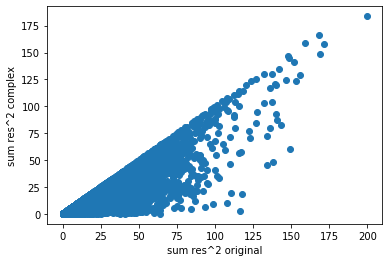

20.8623562982 19.789276207220553 17.41773365337891 11.615456727234355


In [71]:
plt.scatter(a.iloc[:,1],b.iloc[:,1])
plt.xlabel('sum res^2 original')
plt.ylabel('sum res^2 complex')
plt.show()
print(a.iloc[:,0].mean(),b.iloc[:,0].mean(),a.iloc[:,1].mean(),b.iloc[:,1].mean())

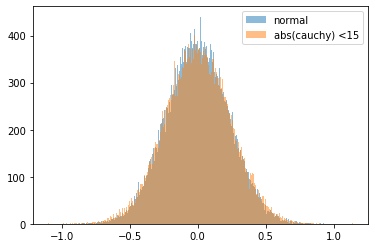

(2.283387188194393,
 2.3778387108776933,
 -0.05787650459281621,
 3.3186397878349863)

In [72]:
from scipy.stats import norm, kurtosis
from scipy.stats import cauchy
trial=100000
m1=[]
v1=[]
k1=[]
nsample=100
for i in range(trial):
    s = np.random.normal(0, 2.3, 100)
    m1.append(np.mean(s))
    v1.append(np.std(s))
    k1.append(kurtosis(s))
m2=[]
v2=[]
k2=[]
for i in range(trial):
    s=[]
    i=1
    while i<=100:
        s0 = (cauchy.rvs(0,1,1))
        if abs(s0)<10:
            s.append(s0)
            i+=1
    m2.append(np.mean(s))
    v2.append(np.std(s))
    k2.append(kurtosis(s))
bins=np.linspace(np.min(m2),np.max(m2),1000)
plt.hist(m1,bins=bins,label='normal',alpha=0.5)
plt.hist(m2,bins=bins,label='abs(cauchy) <15',alpha=0.5)
plt.legend()
plt.show()
np.mean(v1),np.mean(v2),np.mean(k1),np.mean(k2)

AICも残差も複雑な方が小さい。

これがモデル選択のシミュレーションの結果だ。つまり、自分の置かれた状況で、自分で判断するしかないということだ。

## 例１． [Spector and Mazzeo (1980)](https://www.statsmodels.org/stable/datasets/generated/spector.html) - 個人向け教育プログラム(PSI)の効果

個人向け教育プログラムによる効果の実データ

データの詳細：32行、4列

|変数名|説明|
|:-:|:-:|
|Grade | 生徒の評価点(GPA)が改善したかどうかの2値データ。１が改善。|
|TUCE| 経済のテストの評価点
|GPA| 生徒の評価点(GPA)の平均
|PSI|プログラムへの参加の可否

In [73]:
# Load modules and data
spector_data = sm.datasets.spector.load(as_pandas=False)
print(spector_data.endog[:])
print(spector_data.exog[:])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 1. 1. 0. 1. 1. 0. 1.]
[[ 2.66 20.    0.  ]
 [ 2.89 22.    0.  ]
 [ 3.28 24.    0.  ]
 [ 2.92 12.    0.  ]
 [ 4.   21.    0.  ]
 [ 2.86 17.    0.  ]
 [ 2.76 17.    0.  ]
 [ 2.87 21.    0.  ]
 [ 3.03 25.    0.  ]
 [ 3.92 29.    0.  ]
 [ 2.63 20.    0.  ]
 [ 3.32 23.    0.  ]
 [ 3.57 23.    0.  ]
 [ 3.26 25.    0.  ]
 [ 3.53 26.    0.  ]
 [ 2.74 19.    0.  ]
 [ 2.75 25.    0.  ]
 [ 2.83 19.    0.  ]
 [ 3.12 23.    1.  ]
 [ 3.16 25.    1.  ]
 [ 2.06 22.    1.  ]
 [ 3.62 28.    1.  ]
 [ 2.89 14.    1.  ]
 [ 3.51 26.    1.  ]
 [ 3.54 24.    1.  ]
 [ 2.83 27.    1.  ]
 [ 3.39 17.    1.  ]
 [ 2.67 24.    1.  ]
 [ 3.65 21.    1.  ]
 [ 4.   23.    1.  ]
 [ 3.1  21.    1.  ]
 [ 2.39 19.    1.  ]]


data.endog: Grade
data.exdog: TUCE, GPA, PSI

まずはstatsmodelsのリファレンスのサンプルを動かす。

In [74]:
X = sm.add_constant(spector_data.exog, prepend=False)
X

array([[ 2.66, 20.  ,  0.  ,  1.  ],
       [ 2.89, 22.  ,  0.  ,  1.  ],
       [ 3.28, 24.  ,  0.  ,  1.  ],
       [ 2.92, 12.  ,  0.  ,  1.  ],
       [ 4.  , 21.  ,  0.  ,  1.  ],
       [ 2.86, 17.  ,  0.  ,  1.  ],
       [ 2.76, 17.  ,  0.  ,  1.  ],
       [ 2.87, 21.  ,  0.  ,  1.  ],
       [ 3.03, 25.  ,  0.  ,  1.  ],
       [ 3.92, 29.  ,  0.  ,  1.  ],
       [ 2.63, 20.  ,  0.  ,  1.  ],
       [ 3.32, 23.  ,  0.  ,  1.  ],
       [ 3.57, 23.  ,  0.  ,  1.  ],
       [ 3.26, 25.  ,  0.  ,  1.  ],
       [ 3.53, 26.  ,  0.  ,  1.  ],
       [ 2.74, 19.  ,  0.  ,  1.  ],
       [ 2.75, 25.  ,  0.  ,  1.  ],
       [ 2.83, 19.  ,  0.  ,  1.  ],
       [ 3.12, 23.  ,  1.  ,  1.  ],
       [ 3.16, 25.  ,  1.  ,  1.  ],
       [ 2.06, 22.  ,  1.  ,  1.  ],
       [ 3.62, 28.  ,  1.  ,  1.  ],
       [ 2.89, 14.  ,  1.  ,  1.  ],
       [ 3.51, 26.  ,  1.  ,  1.  ],
       [ 3.54, 24.  ,  1.  ,  1.  ],
       [ 2.83, 27.  ,  1.  ,  1.  ],
       [ 3.39, 17.  ,  1.  ,  1.  ],
 

In [75]:
# Fit and summarize OLS model
mod = sm.OLS(spector_data.endog, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     6.646
Date:                Tue, 24 Nov 2020   Prob (F-statistic):            0.00157
Time:                        13:58:52   Log-Likelihood:                -12.978
No. Observations:                  32   AIC:                             33.96
Df Residuals:                      28   BIC:                             39.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4639      0.162      2.864      0.0

条件数が多いので、$p$値の高い評価点(GPA)を除く。

In [76]:
X=spector_data.exog[:,::2]
X

array([[2.66, 0.  ],
       [2.89, 0.  ],
       [3.28, 0.  ],
       [2.92, 0.  ],
       [4.  , 0.  ],
       [2.86, 0.  ],
       [2.76, 0.  ],
       [2.87, 0.  ],
       [3.03, 0.  ],
       [3.92, 0.  ],
       [2.63, 0.  ],
       [3.32, 0.  ],
       [3.57, 0.  ],
       [3.26, 0.  ],
       [3.53, 0.  ],
       [2.74, 0.  ],
       [2.75, 0.  ],
       [2.83, 0.  ],
       [3.12, 1.  ],
       [3.16, 1.  ],
       [2.06, 1.  ],
       [3.62, 1.  ],
       [2.89, 1.  ],
       [3.51, 1.  ],
       [3.54, 1.  ],
       [2.83, 1.  ],
       [3.39, 1.  ],
       [2.67, 1.  ],
       [3.65, 1.  ],
       [4.  , 1.  ],
       [3.1 , 1.  ],
       [2.39, 1.  ]])

In [77]:
X = sm.add_constant(X, prepend=False)
y=spector_data.endog
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     10.07
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           0.000478
Time:                        13:58:52   Log-Likelihood:                -13.143
No. Observations:                  32   AIC:                             32.29
Df Residuals:                      29   BIC:                             36.68
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4975      0.148      3.370      0.0

結果が落ち着いてきた。今度は経済の評価点を除く。

In [78]:
X = sm.add_constant(spector_data.exog[:,2], prepend=False)
X

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [79]:
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     6.529
Date:                Tue, 24 Nov 2020   Prob (F-statistic):             0.0159
Time:                        13:58:52   Log-Likelihood:                -18.431
No. Observations:                  32   AIC:                             40.86
Df Residuals:                      30   BIC:                             43.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4048      0.158      2.555      0.0

切片は要らないかもしれない。

In [80]:
X = spector_data.exog[:,2]
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.416
Model:                            OLS   Adj. R-squared (uncentered):              0.397
Method:                 Least Squares   F-statistic:                              22.04
Date:                Tue, 24 Nov 2020   Prob (F-statistic):                    5.14e-05
Time:                        13:58:52   Log-Likelihood:                         -19.726
No. Observations:                  32   AIC:                                      41.45
Df Residuals:                      31   BIC:                                      42.92
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

結果は大分すっきりした。プログラムに参加すると成績は上がりそうだ。実際にデータで見てみよう。

In [81]:
spector_data.endog[spector_data.exog[:,2]==0].sum(),spector_data.endog[spector_data.exog[:,2]==1].sum()

(3.0, 8.0)

プログラムに参加しなくて成績が改善した人が3人、参加した人で改善した人が8人であった。プログラムに参加した人の数は

In [82]:
spector_data.exog[spector_data.exog[:,2]==1][:,2].sum()

14.0

14人であるので、成績が改善する確率は5割を超える。

Gradeは改善、非改善を1,0の2値で表している。こちらはダミー変数とは言わないが、PSIはプログラムの参加、不参加を1,0の2値で表しているので、これはダミー変数と見ることができる。結果をグラフにしてみよう。

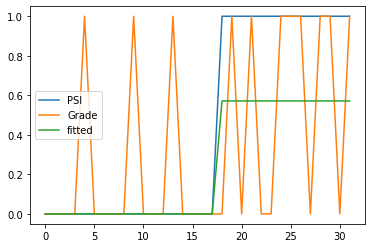

In [83]:
X=spector_data.exog[:,2]
#X = sm.add_constant(X, prepend=False)
y=spector_data.endog
mod = sm.OLS(y, X)
res = mod.fit()
plt.plot(X,label='PSI')
plt.plot(y,label='Grade')
plt.plot(res.fittedvalues,label='fitted')
plt.legend()

In [84]:
X = spector_data.exog[:,1]
X = sm.add_constant(X, prepend=False)
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     3.034
Date:                Tue, 24 Nov 2020   Prob (F-statistic):             0.0918
Time:                        13:58:52   Log-Likelihood:                -20.040
No. Observations:                  32   AIC:                             44.08
Df Residuals:                      30   BIC:                             47.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0375      0.022      1.742      0.0

In [85]:
X = spector_data.exog[:,1]
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.384
Model:                            OLS   Adj. R-squared (uncentered):              0.364
Method:                 Least Squares   F-statistic:                              19.34
Date:                Tue, 24 Nov 2020   Prob (F-statistic):                    0.000120
Time:                        13:58:52   Log-Likelihood:                         -20.563
No. Observations:                  32   AIC:                                      43.13
Df Residuals:                      31   BIC:                                      44.59
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

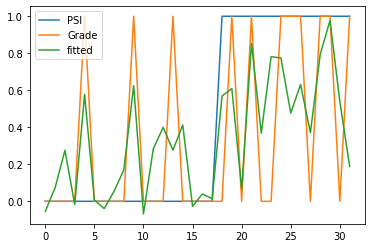

In [86]:
X=spector_data.exog[:]
X = sm.add_constant(X, prepend=False)
y=spector_data.endog
mod = sm.OLS(y, X)
res = mod.fit()
plt.plot(X[:,2],label='PSI')
plt.plot(y,label='Grade')
plt.plot(res.fittedvalues,label='fitted')
plt.legend()

# 推定の問題

データの特徴が明確に定められることはまれであるので、母集団回帰関数を得られることはまれであり、標本回帰関数を推定する必要がある。その推定値が最良線形不偏推定量であるためには  
1) パラメータに対して線形  
2) x(独立変数、説明変数)は確率変数ではなく固定値、または確率変数の場合は誤差項と独立  
3) 誤差の平均値はゼロ  
4) 誤差の分散は一定  
5) 誤差の間の共分散はゼロ  
6) 観測値の数はパラメータの数よりも多い  
7) xには外れ値などが含まれない  
という条件が課される。

これに誤差が正規分布にしたがうという条件を加えると推定値はさまざな[統計的仮説検定](https://qiita.com/innovation1005/items/00362c2129bfe25fe272)に耐えうるものになる。

# 内生変数と外生変数

同時方程式、構造モデルに用いられる変数は、endogは内生変数と事前に決定された変数に分けられる。内生変数、つまりモデル内で決定される値である。事前に決定された変数は、モデルの外部で決定されたものだ。内生変数は確率変数と見なされるが、事前に決定された変数は非確率変数と見なされる。事前に決定された変数は、2つのカテゴリに分類される。現在と遅延した外生変数exogと遅延した内生変数だ。一般に1つの方程式からなるモデルは、従属変数がendog、説明変数がexogになる。また、endogだけで済んでしまうモデルもある。



# 加重最小二乗法

データの分散が一定でない分散不均一性がある場合、古典的モデルの他のすべての仮定を保持すると、OLS推定量とその分散はどうなるのだろうか？この質問に答えるために、2変数モデルを用いる。古典的モデルの他のすべての仮定を保持する。

加重最小二乗法は一般化最小二乗法の特別な場合である。

加重最小二乗法では誤差項の真の分散が既知であることが前提であるので、誤差項の逆数を用いた重みを用いて最小二乗法を適用する。

### 例：人工データの生成－分散不均一性の場合
#### モデルの前提条件
##### モデルの誤特定

真のモデルは二次方程式の形式である。

線形で推定する。

誤差項は独立したノイズである。

人工的に作られるデータは、誤差の分散は高い、低いという2つグループから構成される。

In [87]:
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)
np.random.seed(1024)

nsample = 50
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, (x - 5)**2))
X = sm.add_constant(X)
X[:5]

array([[ 1.        ,  0.        , 25.        ],
       [ 1.        ,  0.40816327, 21.0849646 ],
       [ 1.        ,  0.81632653, 17.5031237 ],
       [ 1.        ,  1.2244898 , 14.2544773 ],
       [ 1.        ,  1.63265306, 11.33902541]])

In [88]:
w = np.ones(nsample)
w[nsample * 6//10:] = 3
w

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])

In [89]:
# 重さをチェック：途中から3になっているのが分かる。

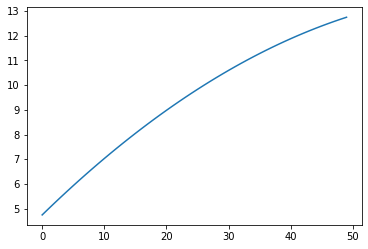

In [90]:
beta = [5., 0.5, -0.01]
sig = 0.5
y_true = np.dot(X, beta) #Xとbetaの掛け算
plt.plot(y_true)

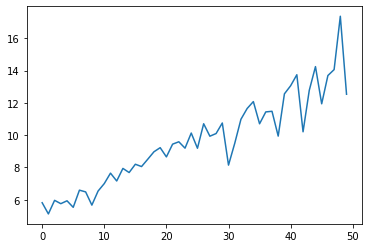

In [91]:
e = np.random.normal(size=nsample)
y = y_true + sig * w * e 
plt.plot(y)

In [92]:
X = X[:,[0,1]]
X[:5]

array([[1.        , 0.        ],
       [1.        , 0.40816327],
       [1.        , 0.81632653],
       [1.        , 1.2244898 ],
       [1.        , 1.63265306]])

In [93]:
mod_wls = sm.WLS(y, X, weights=1./(w ** 2))
res_wls = mod_wls.fit()
print(res_wls.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.927
Model:                            WLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     613.2
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           5.44e-29
Time:                        13:58:53   Log-Likelihood:                -51.136
No. Observations:                  50   AIC:                             106.3
Df Residuals:                      48   BIC:                             110.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2469      0.143     36.790      0.0

レポートには$x1$しか出てこないが、X = X[:,[0,1]]という処置をしているからである。

In [94]:
# 最小二乗法と加重最小二乗法の比較
res_ols = sm.OLS(y, X).fit()
print(res_ols.params)
print(res_wls.params)

[5.24256099 0.43486879]
[5.24685499 0.44658241]


結果の差は微妙である。

WLS の標準誤差と分散不均一性をもつ最小二乗法による標準誤差との比較(MacKinnon and White's (1985)の代替標準偏差)

In [95]:
se = np.vstack([[res_wls.bse], [res_ols.bse], [res_ols.HC0_se], 
                [res_ols.HC1_se], [res_ols.HC2_se], [res_ols.HC3_se]])
se = np.round(se,4)
se

array([[0.1426, 0.018 ],
       [0.2707, 0.0233],
       [0.194 , 0.0281],
       [0.198 , 0.0287],
       [0.2003, 0.029 ],
       [0.207 , 0.03  ]])

In [96]:
colnames = ['x1', 'const']
rownames = ['WLS', 'OLS', 'OLS_HC0', 'OLS_HC1', 'OLS_HC3', 'OLS_HC3']
tabl = SimpleTable(se, colnames, rownames, txt_fmt=default_txt_fmt)
print(tabl)

          x1   const 
---------------------
WLS     0.1426  0.018
OLS     0.2707 0.0233
OLS_HC0  0.194 0.0281
OLS_HC1  0.198 0.0287
OLS_HC3 0.2003  0.029
OLS_HC3  0.207   0.03
---------------------


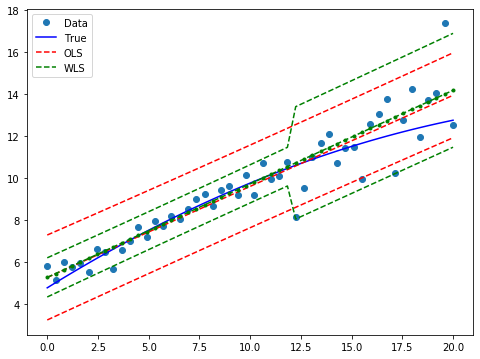

In [97]:
# OLSによる予測とデータ範囲:

from scipy import stats
covb = res_ols.cov_params()
prediction_var = res_ols.mse_resid + (X * np.dot(covb,X.T).T).sum(1)
prediction_std = np.sqrt(prediction_var)
tppf = stats.t.ppf(0.975, res_ols.df_resid)
prstd_ols, iv_l_ols, iv_u_ols = wls_prediction_std(res_ols)

# Draw a plot to compare predicted values in WLS and OLS:

prstd, iv_l, iv_u = wls_prediction_std(res_wls)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="Data")
ax.plot(x, y_true, 'b-', label="True")
# OLS
ax.plot(x, res_ols.fittedvalues, 'r--')
ax.plot(x, iv_u_ols, 'r--', label="OLS")
ax.plot(x, iv_l_ols, 'r--')
# WLS
ax.plot(x, res_wls.fittedvalues, 'g--.')
ax.plot(x, iv_u, 'g--', label="WLS")
ax.plot(x, iv_l, 'g--')
ax.legend(loc="best");

中心にある赤の点線と緑の点線の違いは微妙だ。しかし、その予測値の幅を見ると違いは明確だ。緑の点線は途中から大きく広がっている。これが重みの１と3の違いだ。

In [98]:
# 二段階加重最小二乗法

resid1 = res_ols.resid[w==1.]
var1 = resid1.var(ddof=int(res_ols.df_model)+1)
resid2 = res_ols.resid[w!=1.]
var2 = resid2.var(ddof=int(res_ols.df_model)+1)
w_est = w.copy()
w_est[w!=1.] = np.sqrt(var2) / np.sqrt(var1)
res_fwls = sm.WLS(y, X, 1./((w_est ** 2))).fit()
print(res_fwls.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.931
Model:                            WLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     646.7
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           1.66e-29
Time:                        13:58:53   Log-Likelihood:                -50.716
No. Observations:                  50   AIC:                             105.4
Df Residuals:                      48   BIC:                             109.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2363      0.135     38.720      0.0

こちらの方が結果は若干改善している。

# 一般化最小二乗法

E($u_i^2 =σ_i^2$）を使用して分散不均一性を導入し、古典的モデルの他のすべての仮定を保持すると、OLS推定量とその分散はどうなるのだろうか？一般化最小二乗法では分散不均一性とか自己相関をもつ擾乱項を変換して回帰係数を推定している。

## 例 [Longley(1967)の雇用統計データ](https://www.statsmodels.org/devel/datasets/generated/longley.html)

[Longley(1967)のデータ](https://www.statsmodels.org/devel/datasets/generated/longley.html)を使用して、分散不均一性について理解する。

観測値の数 - 6

変数名と内容::

        TOTEMP - 総雇用者数(endog)
        GNPDEFL - GNP デフレーター
        GNP - GNP
        UNEMP - 非雇用者数
        ARMED - 軍隊の規模
        POP - 人口
        YEAR - 西暦 (1947 - 1962)
- step 1

最初にOLSでデータの当てはめを行い、誤差を取得する。その誤差がAR(1)にしたがうと仮定する。

$$ y_i= a+b_1X_{1,i}+\cdots+\epsilon_i$$
$$ \epsilon_i=\beta_0+\rho \epsilon_{i-1}+\eta_i \ \ \eta \sim \textrm{N}(0,\Sigma^2)$$

- step 2

検定によりstep 1の結果を評価する。評価の結果が良くなくても誤差がAR(1)にしたがうと仮定して推定を継続する。その際にAR(1)の相関構造を[toeplits行列](https://ja.wikipedia.org/wiki/%E3%83%86%E3%83%97%E3%83%AA%E3%83%83%E3%83%84%E8%A1%8C%E5%88%97)を用いてモデル化する。これで自己回帰係数の影響をモデル化している。$\rho$は既知ではないので、推定値を使用する。$\rho$の推定値が正しいかどうかもわからない。


In [99]:
# step 1
data = sm.datasets.longley.load(as_pandas=False)
data.exog

array([[8.30000e+01, 2.34289e+05, 2.35600e+03, 1.59000e+03, 1.07608e+05,
        1.94700e+03],
       [8.85000e+01, 2.59426e+05, 2.32500e+03, 1.45600e+03, 1.08632e+05,
        1.94800e+03],
       [8.82000e+01, 2.58054e+05, 3.68200e+03, 1.61600e+03, 1.09773e+05,
        1.94900e+03],
       [8.95000e+01, 2.84599e+05, 3.35100e+03, 1.65000e+03, 1.10929e+05,
        1.95000e+03],
       [9.62000e+01, 3.28975e+05, 2.09900e+03, 3.09900e+03, 1.12075e+05,
        1.95100e+03],
       [9.81000e+01, 3.46999e+05, 1.93200e+03, 3.59400e+03, 1.13270e+05,
        1.95200e+03],
       [9.90000e+01, 3.65385e+05, 1.87000e+03, 3.54700e+03, 1.15094e+05,
        1.95300e+03],
       [1.00000e+02, 3.63112e+05, 3.57800e+03, 3.35000e+03, 1.16219e+05,
        1.95400e+03],
       [1.01200e+02, 3.97469e+05, 2.90400e+03, 3.04800e+03, 1.17388e+05,
        1.95500e+03],
       [1.04600e+02, 4.19180e+05, 2.82200e+03, 2.85700e+03, 1.18734e+05,
        1.95600e+03],
       [1.08400e+02, 4.42769e+05, 2.93600e+03, 2.7

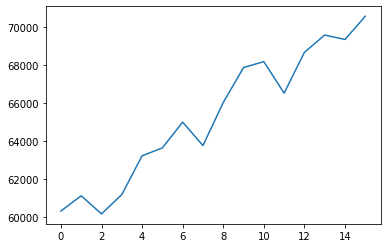

In [100]:
plt.plot(data.endog)

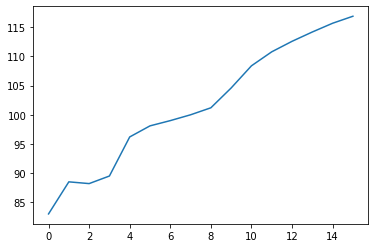

In [101]:
plt.plot(data.exog[:,0])

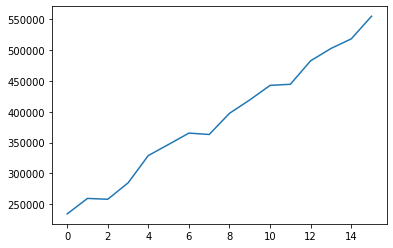

In [102]:
plt.plot(data.exog[:,1])

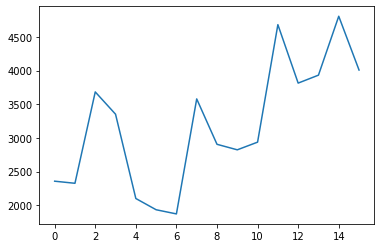

In [103]:
plt.plot(data.exog[:,2])

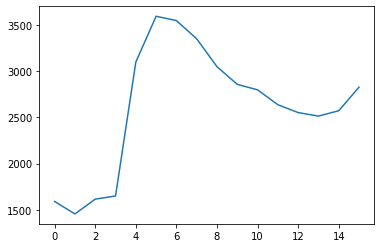

In [104]:
plt.plot(data.exog[:,3])

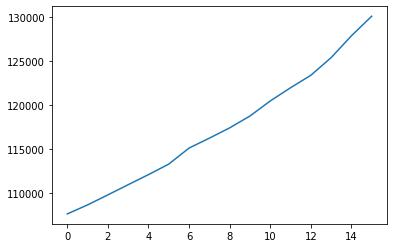

In [105]:
plt.plot(data.exog[:,4])

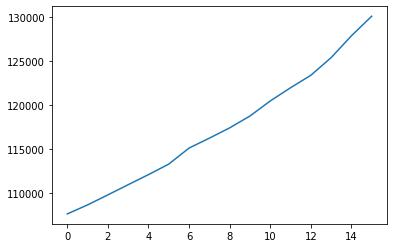

In [106]:
plt.plot(data.exog[:,4])

In [107]:
import seaborn as sns

In [108]:
correlation_matrix = np.corrcoef(data.exog[:,1:].transpose())
correlation_matrix

array([[ 1.        ,  0.60426094,  0.44643679,  0.99109007,  0.99527348],
       [ 0.60426094,  1.        , -0.17742063,  0.68655152,  0.6682566 ],
       [ 0.44643679, -0.17742063,  1.        ,  0.36441627,  0.41724515],
       [ 0.99109007,  0.68655152,  0.36441627,  1.        ,  0.99395285],
       [ 0.99527348,  0.6682566 ,  0.41724515,  0.99395285,  1.        ]])

In [109]:
data.exog = sm.add_constant(data.exog)
print(data.exog[:5])

[[1.00000e+00 8.30000e+01 2.34289e+05 2.35600e+03 1.59000e+03 1.07608e+05
  1.94700e+03]
 [1.00000e+00 8.85000e+01 2.59426e+05 2.32500e+03 1.45600e+03 1.08632e+05
  1.94800e+03]
 [1.00000e+00 8.82000e+01 2.58054e+05 3.68200e+03 1.61600e+03 1.09773e+05
  1.94900e+03]
 [1.00000e+00 8.95000e+01 2.84599e+05 3.35100e+03 1.65000e+03 1.10929e+05
  1.95000e+03]
 [1.00000e+00 9.62000e+01 3.28975e+05 2.09900e+03 3.09900e+03 1.12075e+05
  1.95100e+03]]


In [110]:
ols = sm.OLS(data.endog, data.exog).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     330.3
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           4.98e-10
Time:                        13:58:55   Log-Likelihood:                -109.62
No. Observations:                  16   AIC:                             233.2
Df Residuals:                       9   BIC:                             238.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.482e+06    8.9e+05     -3.911      0.004    -5.5e+06   -1.47e+06
x1            15.0619     84.915      0.177      0.863    -177.029     207.153
x2            -0.0358      0.033     -1.070      0.313      -0.112       0.040
x3            -2.0202      0.488     -4.136      0.003      -3.125      -0.915
x4            -1.0332      0.214     -4.822      0.001      -1.518      -0.549
x5            -0.0511      0.226     -0.226      0.826      -0.563       0.460
x6          1829.1515    455.478      4.016      0.003     798.788    2859.515
==============================================================================
Omnibus:                        0.749   Durbin-Watson:                   2.559
Prob(Omnibus):                  0.688   Jarque-Bera (JB):                0.684
Skew:                           0.420   Prob(JB):                        0.710
Kurtosis:                       2.434   Cond. No.                     4.86e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.86e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
ols_resid = sm.OLS(data.endog, data.exog).fit().resid

(array([1., 1., 3., 2., 4., 1., 0., 1., 2., 1.]),
 array([-410.1146219 , -323.56375025, -237.0128786 , -150.46200696,
         -63.91113531,   22.63973634,  109.19060799,  195.74147964,
         282.29235129,  368.84322293,  455.39409458]),
 <a list of 10 Patch objects>)

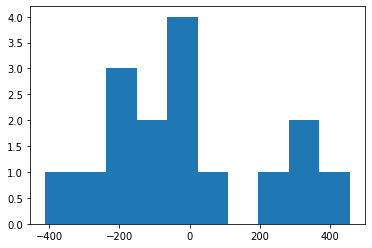

In [112]:
plt.hist(ols_resid)

(array([1., 0., 1., 1., 1., 1., 1., 0., 0., 2.]),
 array([-410.1146219 , -338.13170063, -266.14877936, -194.16585809,
        -122.18293682,  -50.20001555,   21.78290571,   93.76582698,
         165.74874825,  237.73166952,  309.71459079]),
 <a list of 10 Patch objects>)

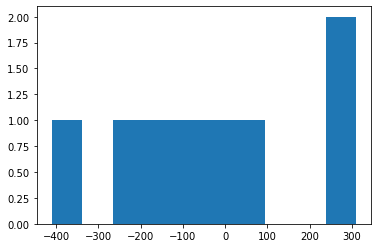

In [113]:
plt.hist(ols_resid[:8])

(array([2., 1., 2., 0., 0., 0., 0., 0., 1., 1.]),
 array([-206.75782516, -140.54263319,  -74.32744121,   -8.11224924,
          58.10294274,  124.31813471,  190.53332669,  256.74851866,
         322.96371063,  389.17890261,  455.39409458]),
 <a list of 10 Patch objects>)

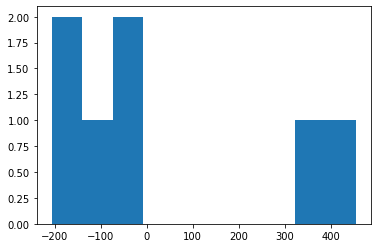

In [114]:
plt.hist(ols_resid[9:])

In [115]:
np.mean(ols_resid)

3.1424860935658216e-08

In [116]:
np.std(ols_resid)

228.64055517139158

In [117]:
np.std(ols_resid[:8])

230.21852406889195

In [118]:
np.std(ols_resid[9:])

235.47598912585488

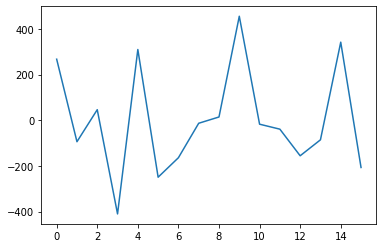

In [119]:
plt.plot(ols_resid)

In [120]:
resid_fit = sm.OLS(ols_resid[1:], sm.add_constant(ols_resid[:-1])).fit()
resid_fit.summary()

C:\Users\moriya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     2.071
Date:                Tue, 24 Nov 2020   Prob (F-statistic):              0.174
Time:                        13:58:55   Log-Likelihood:                -101.43
No. Observations:                  15   AIC:                             206.9
Df Residuals:                      13   BIC:                             208.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.8132     58.094     -0.221      0.829    -138.317     112.690
x1            -0.3634      0.253     -1.439      0.174      -0.909       0.182
==============================================================================
Omnibus:                        1.696   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.428   Jarque-Bera (JB):                0.687
Skew:                           0.523   Prob(JB):                        0.709
Kurtosis:                       3.081   Cond. No.                         230.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
print(resid_fit.tvalues[1])
print(resid_fit.pvalues[1])

-1.4390229839705615
0.17378444788898745


In [122]:
# step 2

rho = resid_fit.params[1]
rho

-0.3634294908762582

In [123]:
from scipy.linalg import toeplitz
range(5)

range(0, 5)

In [124]:
toeplitz(range(5))

array([[0, 1, 2, 3, 4],
       [1, 0, 1, 2, 3],
       [2, 1, 0, 1, 2],
       [3, 2, 1, 0, 1],
       [4, 3, 2, 1, 0]])

In [125]:
order = toeplitz(range(len(ols_resid)))
order

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [ 1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       [ 2,  1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 3,  2,  1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 4,  3,  2,  1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 5,  4,  3,  2,  1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 6,  5,  4,  3,  2,  1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 7,  6,  5,  4,  3,  2,  1,  0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 8,  7,  6,  5,  4,  3,  2,  1,  0,  1,  2,  3,  4,  5,  6,  7],
       [ 9,  8,  7,  6,  5,  4,  3,  2,  1,  0,  1,  2,  3,  4,  5,  6],
       [10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0,  1,  2,  3,  4,  5],
       [11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0,  1,  2,  3,  4],
       [12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0,  1,  2,  3],
       [13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,

In [126]:
sigma = rho**order
sigma

array([[ 1.00000000e+00, -3.63429491e-01,  1.32080995e-01,
        -4.80021287e-02,  1.74453892e-02, -6.34016891e-03,
         2.30420436e-03, -8.37415818e-04,  3.04341604e-04,
        -1.10606714e-04,  4.01977419e-05, -1.46090449e-05,
         5.30935774e-06, -1.92957718e-06,  7.01265252e-07,
        -2.54860473e-07],
       [-3.63429491e-01,  1.00000000e+00, -3.63429491e-01,
         1.32080995e-01, -4.80021287e-02,  1.74453892e-02,
        -6.34016891e-03,  2.30420436e-03, -8.37415818e-04,
         3.04341604e-04, -1.10606714e-04,  4.01977419e-05,
        -1.46090449e-05,  5.30935774e-06, -1.92957718e-06,
         7.01265252e-07],
       [ 1.32080995e-01, -3.63429491e-01,  1.00000000e+00,
        -3.63429491e-01,  1.32080995e-01, -4.80021287e-02,
         1.74453892e-02, -6.34016891e-03,  2.30420436e-03,
        -8.37415818e-04,  3.04341604e-04, -1.10606714e-04,
         4.01977419e-05, -1.46090449e-05,  5.30935774e-06,
        -1.92957718e-06],
       [-4.80021287e-02,  1.32080995e

In [127]:
gls_model = sm.GLS(data.endog, data.exog, sigma=sigma)
gls_results = gls_model.fit()
print(gls_results.summary())

                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            GLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     724.0
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           1.48e-11
Time:                        13:58:56   Log-Likelihood:                -107.50
No. Observations:                  16   AIC:                             229.0
Df Residuals:                       9   BIC:                             234.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.798e+06   6.71e+05     -5.663      0.0

In [128]:
glsar_model = sm.GLSAR(data.endog, data.exog, 1)
glsar_results = glsar_model.iterative_fit(1)
print(glsar_results.summary())

                           GLSAR Regression Results                           
Dep. Variable:                      y   R-squared:                       0.996
Model:                          GLSAR   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     295.2
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           6.09e-09
Time:                        13:58:56   Log-Likelihood:                -102.04
No. Observations:                  15   AIC:                             218.1
Df Residuals:                       8   BIC:                             223.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.468e+06   8.72e+05     -3.979      0.0

In [129]:
print(gls_results.params)
print(glsar_results.params)
print(gls_results.bse)
print(glsar_results.bse)

[-3.79785490e+06 -1.27656454e+01 -3.80013250e-02 -2.18694871e+00
 -1.15177649e+00 -6.80535580e-02  1.99395293e+03]
[-3.46796063e+06  3.45567846e+01 -3.43410090e-02 -1.96214395e+00
 -1.00197296e+00 -9.78045986e-02  1.82318289e+03]
[6.70688699e+05 6.94308073e+01 2.62476822e-02 3.82393151e-01
 1.65252692e-01 1.76428334e-01 3.42634628e+02]
[8.71584052e+05 8.47337145e+01 3.28032450e-02 4.80544865e-01
 2.11383871e-01 2.24774369e-01 4.45828748e+02]


# 再帰最小二乗法(Koopman(2013))

最小二乗法のデータの窓枠を再帰的に変更して、回帰係数の特性を再帰的に算出される誤差項を用いて評価しながら最適化を図る方法。

RecursiveLSクラスでは再帰的誤差項を算出し、CUSUMとCUSUMの二乗統計を算出する。基準線に対してこれらの数値をプロットすることで、パラメータが安定であるという帰無仮説を目視で重要な乖離があるかどうかを判断する。

RecursiveLSモデルではその結果を踏まえて、パラメータのベクトルに線形の制約を課し、モデルの推定に用いる。

## 例1：銅の世界消費量(Gill)

データは1951年から1975年までの世界の銅市場を表している。Gillの例では、2段階の操作で推定された出力変数は25年間における世界市場の銅の消費量である。説明変数は1000メートルトンで見た世界の銅の消費量、調整済み銅価格、代替品としてのアルミニウムの価格、1970年を基準とした一人当たりの実質収入、製造業の在庫の変化の指数と時間トレンドである。

- step 1

モデルを適合する。RLSでは遂次的に回帰係数を算出するために、データ点だけの推定が存在する。サマリーレポートはすべてのデータを用いたときの結果だけを示している。これらの結果はOLSのものと同じである。

説明変数には切片を加えている。

In [130]:
from pandas_datareader.data import DataReader
import pandas as pd

np.set_printoptions(suppress=True)

print(sm.datasets.copper.DESCRLONG)

dta = sm.datasets.copper.load_pandas().data
dta.index = pd.date_range('1951-01-01M', '1975-01-01', freq='AS')
endog = dta['WORLDCONSUMPTION']

# To the regressors in the dataset, we add a column of ones for an intercept
exog = sm.add_constant(dta[['COPPERPRICE', 'INCOMEINDEX', 'ALUMPRICE', 'INVENTORYINDEX']])

This data describes the world copper market from 1951 through 1975.  In an
example, in Gill, the outcome variable (of a 2 stage estimation) is the world
consumption of copper for the 25 years.  The explanatory variables are the
world consumption of copper in 1000 metric tons, the constant dollar adjusted
price of copper, the price of a substitute, aluminum, an index of real per
capita income base 1970, an annual measure of manufacturer inventory change,
and a time trend.



C:\Users\moriya\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [131]:
mod = sm.RecursiveLS(endog, exog)
res = mod.fit()

print(res.summary())

                           Statespace Model Results                           
Dep. Variable:       WORLDCONSUMPTION   No. Observations:                   25
Model:                    RecursiveLS   Log Likelihood                -154.720
Date:                Tue, 24 Nov 2020   R-squared:                       0.965
Time:                        13:58:57   AIC                            319.441
Sample:                    01-01-1951   BIC                            325.535
                         - 01-01-1975   HQIC                           321.131
Covariance Type:            nonrobust   Scale                       117717.127
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -6562.3719   2378.939     -2.759      0.006   -1.12e+04   -1899.737
COPPERPRICE      -13.8132     15.041     -0.918      0.358     -43.292      15.666
INCOMEINDEX      1.21e+04    763.401

# 再帰係数はrecursive_coefficientsから得ることができる。またplot_recursive_coefficient methodから得ることもできる。

[     2.88890087      4.94795049   1558.41803037   1958.43326647
 -51474.95653949  -4168.95010015  -2252.61351252   -446.55910053
  -5288.3979429   -6942.31935003  -7846.08902378  -6643.15120355
  -6274.11014673  -7272.01695475  -6319.02647946  -5822.239286
  -6256.30902239  -6737.40445526  -6477.42840909  -5995.90746352
  -6450.80677247  -6022.92165976  -5258.35152305  -5320.89135907
  -6562.37193091]


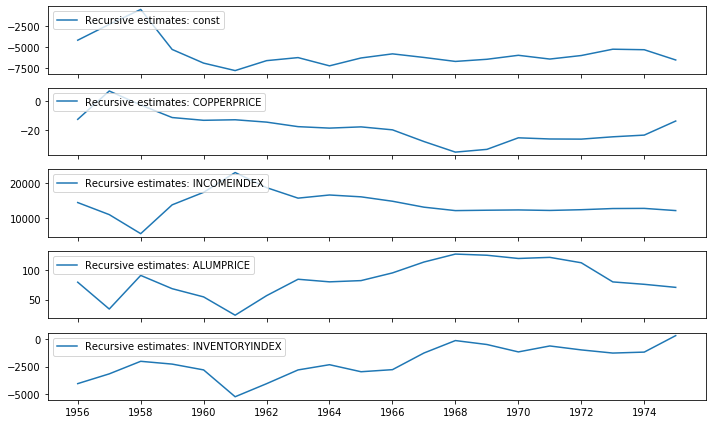

In [132]:
print(res.recursive_coefficients.filtered[0])
res.plot_recursive_coefficient(range(mod.k_exog), alpha=None, figsize=(10,6));

# CUSUM統計はcusumから得られる。
# plot_cusum methodは視的に特性を捉えるのに有効である。
# プロットには５％の信頼区間を表示することも可能である。
# 結果から帰無仮説の棄却するには足らない。

[ 0.69971508  0.65841243  1.24629673  2.05476031  2.39888918  3.17861979
  2.67244671  2.01783214  2.46131746  2.05268637  0.95054335 -1.04505547
 -2.55465287 -2.29908152 -1.45289493 -1.95353994 -1.35046621  0.15789828
  0.63286529 -1.48184587]


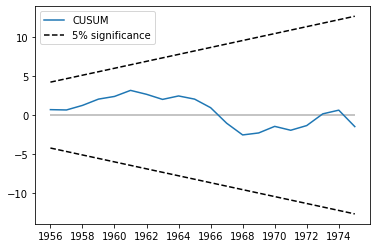

In [133]:
print(res.cusum)
fig = res.plot_cusum();

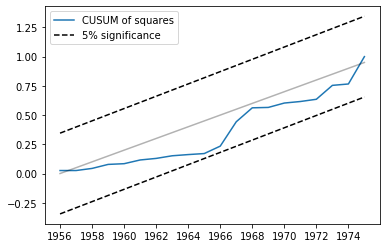

In [134]:
# 関連する統計量としてCUSUMの二乗があり、cusum_squaresから得られる。
# 視覚的にとらえるためにplot_cusum_squares methodが用意されている。 
# 下図から帰無仮説を棄却するには足らない。

res.plot_cusum_squares();

## 例 2: 貨幣数量説

貨幣数量説はマネーの供給量の変化率の変更はインフレの変化率に同等の影響を与えるというものである(Lucas, 1980)。Lucasによると、マネーの増加とCPIのインフレの両側指数平滑平均の関係を見出し、これらの関係が安定しているとしたが、Sargent and Surico (2010)は最近この関係は不安定になっているとした。

$\beta=0.95$として10年の時間窓を用いて、両側指数平滑平均のLucasフィルターを構築した。それをプロットした。標本の前半は安定しているが1990年以降の後半は不安定である。

In [135]:
start = '1959-12-01'
end = '2015-01-01'
m2 = DataReader('M2SL', 'fred', start=start, end=end)
cpi = DataReader('CPIAUCSL', 'fred', start=start, end=end)

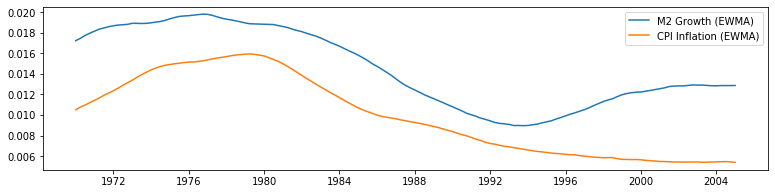

In [136]:
def ewma(series, beta, n_window):
    nobs = len(series)
    scalar = (1 - beta) / (1 + beta)
    ma = []
    k = np.arange(n_window, 0, -1)
    weights = np.r_[beta**k, 1, beta**k[::-1]]
    for t in range(n_window, nobs - n_window):
        window = series.iloc[t - n_window:t + n_window+1].values
        ma.append(scalar * np.sum(weights * window))
    return pd.Series(ma, name=series.name, index=series.iloc[n_window:-n_window].index)

m2_ewma = ewma(np.log(m2['M2SL'].resample('QS').mean()).diff().iloc[1:], 0.95, 10*4)
cpi_ewma = ewma(np.log(cpi['CPIAUCSL'].resample('QS').mean()).diff().iloc[1:], 0.95, 10*4)

fig, ax = plt.subplots(figsize=(13,3))

ax.plot(m2_ewma, label='M2 Growth (EWMA)')
ax.plot(cpi_ewma, label='CPI Inflation (EWMA)')
ax.legend();

In [137]:
endog = cpi_ewma
exog = sm.add_constant(m2_ewma)
exog.columns = ['const', 'M2']

mod = sm.RecursiveLS(endog, exog)
res = mod.fit()

print(res.summary())

                           Statespace Model Results                           
Dep. Variable:               CPIAUCSL   No. Observations:                  141
Model:                    RecursiveLS   Log Likelihood                 692.784
Date:                Tue, 24 Nov 2020   R-squared:                       0.813
Time:                        13:59:00   AIC                          -1381.567
Sample:                    01-01-1970   BIC                          -1375.670
                         - 01-01-2005   HQIC                         -1379.171
Covariance Type:            nonrobust   Scale                            0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0033      0.001     -5.930      0.000      -0.004      -0.002
M2             0.9097      0.037     24.582      0.000       0.837       0.982
Ljung-Box (Q):                     1858.94   Jarque-

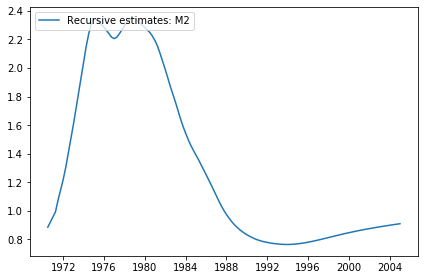

In [138]:
res.plot_recursive_coefficient(1, alpha=None);

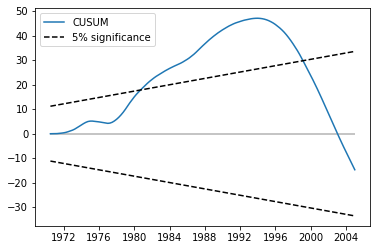

In [139]:
# CUSUMのプロットから ５％水準の大きな乖離がみられ、帰無仮説を棄却した。

res.plot_cusum();

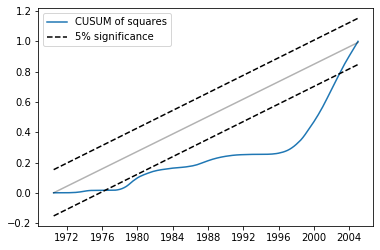

In [140]:
# 同様の結果がCUSUMの二乗分析からも見られる。
res.plot_cusum_squares();

# 例 3: 線形制約と式形式

## 線形制約

モデルを構築すいる際にモデルに線形の制約を課すことは難しいことではない。

In [141]:
endog = dta['WORLDCONSUMPTION']
exog = sm.add_constant(dta[['COPPERPRICE', 'INCOMEINDEX', 'ALUMPRICE', 'INVENTORYINDEX']])

mod = sm.RecursiveLS(endog, exog, constraints='COPPERPRICE = ALUMPRICE')
res = mod.fit()
print(res.summary())

                           Statespace Model Results                           
Dep. Variable:       WORLDCONSUMPTION   No. Observations:                   25
Model:                    RecursiveLS   Log Likelihood                -150.911
Date:                Tue, 24 Nov 2020   R-squared:                       0.989
Time:                        13:59:00   AIC                            309.822
Sample:                    01-01-1951   BIC                            314.698
                         - 01-01-1975   HQIC                           311.174
Covariance Type:            nonrobust   Scale                       137155.014
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -4839.4893   2412.410     -2.006      0.045   -9567.726    -111.253
COPPERPRICE        5.9797     12.704      0.471      0.638     -18.921      30.880
INCOMEINDEX     1.115e+04    666.308

In [142]:
# 式形式(from_formulaメソッドクラス)を用いた線形の制約

mod = sm.RecursiveLS.from_formula(
    'WORLDCONSUMPTION ~ COPPERPRICE + INCOMEINDEX + ALUMPRICE + INVENTORYINDEX', dta,
    constraints='COPPERPRICE = ALUMPRICE')
res = mod.fit()
print(res.summary())

                           Statespace Model Results                           
Dep. Variable:       WORLDCONSUMPTION   No. Observations:                   25
Model:                    RecursiveLS   Log Likelihood                -150.911
Date:                Tue, 24 Nov 2020   R-squared:                       0.989
Time:                        13:59:00   AIC                            309.822
Sample:                    01-01-1951   BIC                            314.698
                         - 01-01-1975   HQIC                           311.174
Covariance Type:            nonrobust   Scale                       137155.014
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -4839.4893   2412.410     -2.006      0.045   -9567.726    -111.253
COPPERPRICE        5.9797     12.704      0.471      0.638     -18.921      30.880
INCOMEINDEX     1.115e+04    666.308

C:\Users\moriya\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
